In [1]:
import reverse_geocoder

In [2]:
state_names = "Texas"
    #get the metadata for the latitude and longitude coordinates
results = reverse_geocoder.search((25.10365,-92.6305 ))

    #check if the location is a US state (the 'admin1' variable is where US states are listed)
    #print(i)
if results[0]['admin1']==state_names:
        print(1)
else:
        print(0)

Loading formatted geocoded file...
1


In [3]:
def get_coords(top_left, bottom_right):

    coord = [top_left[0], top_left[1]]
    lat = top_left[0]
    lon = top_left[1]
    coord = [lat, lon]
    coords = []
    while True:
        index = 0
        if lat > bottom_right[0]:
            lat = coord[0] - 0.045
        else:
            if lon < bottom_right[1]:
                lon = coord[1] + 0.045
                lat = top_left[0]
            else:
                break

        coord = [lat, lon]
        coords.append(coord)
    
    return coords

In [4]:
a=get_coords([36.70365, -107.2705],[25.12539, -92.59277])

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
import shapefile
from shapely.geometry import shape, Point

# read your shapefile
r = shapefile.Reader("Texas_State_Boundary/State.shp")

# get the shapes
shapes = r.shapes()

# build a shapely polygon from your shape
polygon = shape(shapes[0])    

def check(lon, lat):
    # build a shapely point from your geopoint
    point = Point(lon, lat)

    # the contains function does exactly what you want
    return polygon.contains(point)

In [7]:
df = pd.DataFrame(a, columns = ['Latitude', 'Longitude'])

In [8]:
df

,Latitude,Longitude
0,36.65865,-107.2705
1,36.61365,-107.2705
2,36.56865,-107.2705
3,36.52365,-107.2705
4,36.47865,-107.2705
...,...,...
84946,25.27365,-92.5555
84947,25.22865,-92.5555
84948,25.18365,-92.5555
84949,25.13865,-92.5555


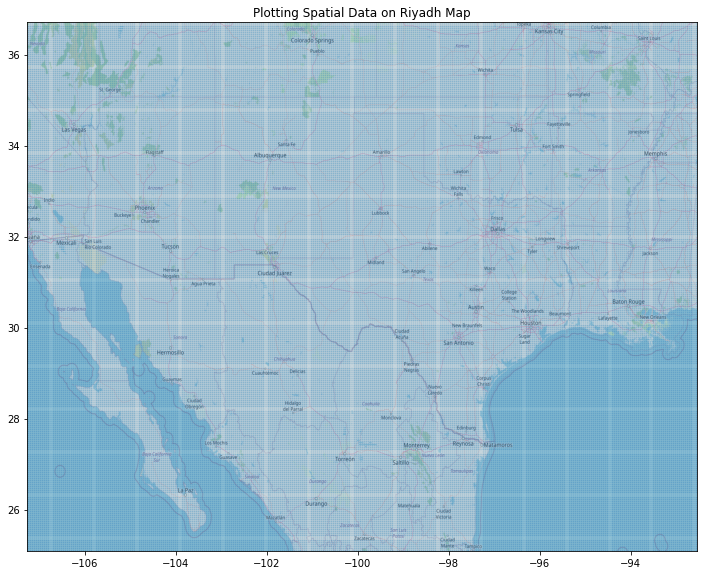

In [9]:
BBox = (df.Longitude.min(),df.Longitude.max(),df.Latitude.min(),df.Latitude.max())
IMG=plt.imread("map.png")
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= .1, s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(IMG, zorder=0, extent = BBox, aspect= 'equal')

C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: >

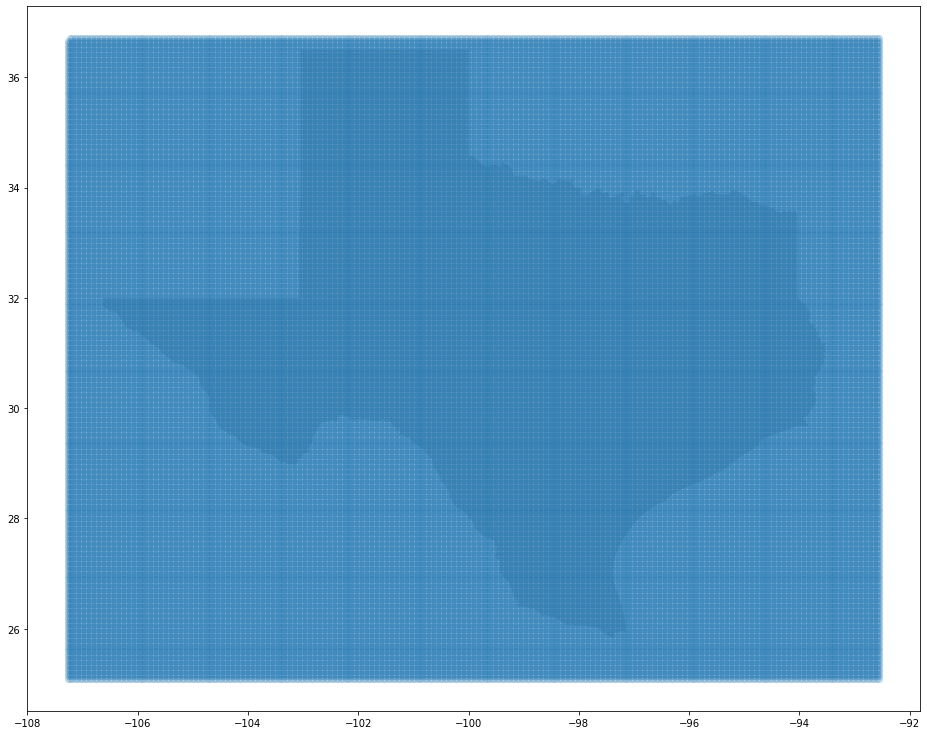

In [10]:
texas = gpd.read_file("Texas_State_Boundary/State.shp")
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry = geometry)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
geo_df.plot(ax=ax,aspect=1, alpha=0.2)

In [11]:
import shapefile
from shapely.geometry import shape, Point

# read your shapefile
r = shapefile.Reader("Texas_State_Boundary/State.shp")

# get the shapes
shapes = r.shapes()

# build a shapely polygon from your shape
polygon = shape(shapes[0])    

def check(lon, lat):
    # build a shapely point from your geopoint
    point = Point(lon, lat)

    # the contains function does exactly what you want
    return polygon.contains(point)

In [12]:
b_a=[]
for i,v in df.iterrows():
    print(i)
    if check(df["Longitude"][i],df["Latitude"][i])==False:
        b_a.append(0)
    else:
        b_a.append(1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600


4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246


5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916


7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561


9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204


10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
1070

11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
1209

13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
1345

14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
1483

16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
1620

17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
17483
17484
17485
17486
17487
17488
17489
17490
17491
17492
17493
17494
17495
17496
17497
17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
1758

18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18901
18902
18903
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18914
18915
18916
18917
18918
18919
18920
18921
18922
18923
18924
18925
18926
18927
18928
18929
18930
18931
18932
18933
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
18945
18946
18947
18948
18949
18950
18951
18952
18953
18954
18955
1895

20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20302
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20318
20319
20320
20321
20322
20323
20324
20325
2032

21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21654
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
21700
21701
21702
2170

22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
2307

24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
2445

25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
2583

27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27176
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
27198
27199
27200
2720

28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
2857

29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
29876
29877
29878
29879
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
2996

31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
31219
31220
31221
31222
31223
31224
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
31235
31236
31237
31238
31239
31240
31241
31242
31243
31244
31245
31246
31247
31248
31249
31250
31251
31252
31253
31254
31255
31256
31257
31258
31259
31260
31261
31262
31263
31264
31265
31266
31267
31268
31269
31270
31271
31272
31273
31274
31275
31276
31277
31278
31279
31280
31281
31282
31283
31284
31285
31286
31287
31288
31289
31290
31291
31292
31293
31294
31295
31296
31297
31298
31299
31300
31301
31302
31303
31304
31305
31306
31307
31308
31309
31310
31311
31312
31313
31314
31315
31316
31317
31318
31319
31320
31321
31322
31323
31324
31325
31326
31327
31328
31329
31330
31331
31332
31333
31334
31335
31336
31337
31338
31339
31340
31341
31342
31343
3134

32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
3271

33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
34053
34054
34055
34056
34057
34058
34059
34060
34061
34062
34063
34064
34065
34066
34067
34068
34069
34070
34071
34072
34073
34074
34075
34076
34077
34078
34079
34080
34081
34082
34083
34084
34085
34086
34087
34088
34089
34090
34091
34092
34093
34094
34095
34096
34097
34098
34099
34100
34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
3411

35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
35375
35376
35377
35378
35379
35380
35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
35468
35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
35485
3548

36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
3685

38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
3825

39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
3962

40835
40836
40837
40838
40839
40840
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
40854
40855
40856
40857
40858
40859
40860
40861
40862
40863
40864
40865
40866
40867
40868
40869
40870
40871
40872
40873
40874
40875
40876
40877
40878
40879
40880
40881
40882
40883
40884
40885
40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
40949
40950
40951
40952
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
40985
40986
40987
40988
40989
40990
40991
40992
40993
40994
40995
40996
40997
40998
40999
41000
4100

42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
42241
42242
42243
42244
42245
42246
42247
42248
42249
42250
42251
42252
42253
42254
42255
42256
42257
42258
42259
42260
42261
42262
42263
42264
42265
42266
42267
42268
42269
42270
42271
42272
42273
42274
42275
42276
42277
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
42294
42295
42296
42297
42298
42299
42300
42301
42302
42303
42304
42305
42306
42307
42308
42309
42310
42311
42312
42313
42314
42315
42316
42317
42318
42319
42320
42321
42322
42323
42324
42325
42326
42327
42328
42329
42330
42331
42332
42333
42334
42335
42336
42337
42338
42339
42340
42341
42342
42343
42344
42345
42346
42347
42348
42349
42350
42351
42352
42353
42354
42355
42356
42357
42358
42359
42360
42361
42362
42363
42364
42365
42366
42367
42368
42369
42370
42371
42372
42373
42374
42375
42376
42377
42378
42379
42380
42381
42382
42383
42384
42385
42386
42387
42388
42389
42390
4239

43600
43601
43602
43603
43604
43605
43606
43607
43608
43609
43610
43611
43612
43613
43614
43615
43616
43617
43618
43619
43620
43621
43622
43623
43624
43625
43626
43627
43628
43629
43630
43631
43632
43633
43634
43635
43636
43637
43638
43639
43640
43641
43642
43643
43644
43645
43646
43647
43648
43649
43650
43651
43652
43653
43654
43655
43656
43657
43658
43659
43660
43661
43662
43663
43664
43665
43666
43667
43668
43669
43670
43671
43672
43673
43674
43675
43676
43677
43678
43679
43680
43681
43682
43683
43684
43685
43686
43687
43688
43689
43690
43691
43692
43693
43694
43695
43696
43697
43698
43699
43700
43701
43702
43703
43704
43705
43706
43707
43708
43709
43710
43711
43712
43713
43714
43715
43716
43717
43718
43719
43720
43721
43722
43723
43724
43725
43726
43727
43728
43729
43730
43731
43732
43733
43734
43735
43736
43737
43738
43739
43740
43741
43742
43743
43744
43745
43746
43747
43748
43749
43750
43751
43752
43753
43754
43755
43756
43757
43758
43759
43760
43761
43762
43763
43764
43765
4376

44972
44973
44974
44975
44976
44977
44978
44979
44980
44981
44982
44983
44984
44985
44986
44987
44988
44989
44990
44991
44992
44993
44994
44995
44996
44997
44998
44999
45000
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
4513

46375
46376
46377
46378
46379
46380
46381
46382
46383
46384
46385
46386
46387
46388
46389
46390
46391
46392
46393
46394
46395
46396
46397
46398
46399
46400
46401
46402
46403
46404
46405
46406
46407
46408
46409
46410
46411
46412
46413
46414
46415
46416
46417
46418
46419
46420
46421
46422
46423
46424
46425
46426
46427
46428
46429
46430
46431
46432
46433
46434
46435
46436
46437
46438
46439
46440
46441
46442
46443
46444
46445
46446
46447
46448
46449
46450
46451
46452
46453
46454
46455
46456
46457
46458
46459
46460
46461
46462
46463
46464
46465
46466
46467
46468
46469
46470
46471
46472
46473
46474
46475
46476
46477
46478
46479
46480
46481
46482
46483
46484
46485
46486
46487
46488
46489
46490
46491
46492
46493
46494
46495
46496
46497
46498
46499
46500
46501
46502
46503
46504
46505
46506
46507
46508
46509
46510
46511
46512
46513
46514
46515
46516
46517
46518
46519
46520
46521
46522
46523
46524
46525
46526
46527
46528
46529
46530
46531
46532
46533
46534
46535
46536
46537
46538
46539
46540
4654

47749
47750
47751
47752
47753
47754
47755
47756
47757
47758
47759
47760
47761
47762
47763
47764
47765
47766
47767
47768
47769
47770
47771
47772
47773
47774
47775
47776
47777
47778
47779
47780
47781
47782
47783
47784
47785
47786
47787
47788
47789
47790
47791
47792
47793
47794
47795
47796
47797
47798
47799
47800
47801
47802
47803
47804
47805
47806
47807
47808
47809
47810
47811
47812
47813
47814
47815
47816
47817
47818
47819
47820
47821
47822
47823
47824
47825
47826
47827
47828
47829
47830
47831
47832
47833
47834
47835
47836
47837
47838
47839
47840
47841
47842
47843
47844
47845
47846
47847
47848
47849
47850
47851
47852
47853
47854
47855
47856
47857
47858
47859
47860
47861
47862
47863
47864
47865
47866
47867
47868
47869
47870
47871
47872
47873
47874
47875
47876
47877
47878
47879
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
4791

49129
49130
49131
49132
49133
49134
49135
49136
49137
49138
49139
49140
49141
49142
49143
49144
49145
49146
49147
49148
49149
49150
49151
49152
49153
49154
49155
49156
49157
49158
49159
49160
49161
49162
49163
49164
49165
49166
49167
49168
49169
49170
49171
49172
49173
49174
49175
49176
49177
49178
49179
49180
49181
49182
49183
49184
49185
49186
49187
49188
49189
49190
49191
49192
49193
49194
49195
49196
49197
49198
49199
49200
49201
49202
49203
49204
49205
49206
49207
49208
49209
49210
49211
49212
49213
49214
49215
49216
49217
49218
49219
49220
49221
49222
49223
49224
49225
49226
49227
49228
49229
49230
49231
49232
49233
49234
49235
49236
49237
49238
49239
49240
49241
49242
49243
49244
49245
49246
49247
49248
49249
49250
49251
49252
49253
49254
49255
49256
49257
49258
49259
49260
49261
49262
49263
49264
49265
49266
49267
49268
49269
49270
49271
49272
49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
4929

50514
50515
50516
50517
50518
50519
50520
50521
50522
50523
50524
50525
50526
50527
50528
50529
50530
50531
50532
50533
50534
50535
50536
50537
50538
50539
50540
50541
50542
50543
50544
50545
50546
50547
50548
50549
50550
50551
50552
50553
50554
50555
50556
50557
50558
50559
50560
50561
50562
50563
50564
50565
50566
50567
50568
50569
50570
50571
50572
50573
50574
50575
50576
50577
50578
50579
50580
50581
50582
50583
50584
50585
50586
50587
50588
50589
50590
50591
50592
50593
50594
50595
50596
50597
50598
50599
50600
50601
50602
50603
50604
50605
50606
50607
50608
50609
50610
50611
50612
50613
50614
50615
50616
50617
50618
50619
50620
50621
50622
50623
50624
50625
50626
50627
50628
50629
50630
50631
50632
50633
50634
50635
50636
50637
50638
50639
50640
50641
50642
50643
50644
50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50655
50656
50657
50658
50659
50660
50661
50662
50663
50664
50665
50666
50667
50668
50669
50670
50671
50672
50673
50674
50675
50676
50677
50678
50679
5068

51893
51894
51895
51896
51897
51898
51899
51900
51901
51902
51903
51904
51905
51906
51907
51908
51909
51910
51911
51912
51913
51914
51915
51916
51917
51918
51919
51920
51921
51922
51923
51924
51925
51926
51927
51928
51929
51930
51931
51932
51933
51934
51935
51936
51937
51938
51939
51940
51941
51942
51943
51944
51945
51946
51947
51948
51949
51950
51951
51952
51953
51954
51955
51956
51957
51958
51959
51960
51961
51962
51963
51964
51965
51966
51967
51968
51969
51970
51971
51972
51973
51974
51975
51976
51977
51978
51979
51980
51981
51982
51983
51984
51985
51986
51987
51988
51989
51990
51991
51992
51993
51994
51995
51996
51997
51998
51999
52000
52001
52002
52003
52004
52005
52006
52007
52008
52009
52010
52011
52012
52013
52014
52015
52016
52017
52018
52019
52020
52021
52022
52023
52024
52025
52026
52027
52028
52029
52030
52031
52032
52033
52034
52035
52036
52037
52038
52039
52040
52041
52042
52043
52044
52045
52046
52047
52048
52049
52050
52051
52052
52053
52054
52055
52056
52057
52058
5205

53262
53263
53264
53265
53266
53267
53268
53269
53270
53271
53272
53273
53274
53275
53276
53277
53278
53279
53280
53281
53282
53283
53284
53285
53286
53287
53288
53289
53290
53291
53292
53293
53294
53295
53296
53297
53298
53299
53300
53301
53302
53303
53304
53305
53306
53307
53308
53309
53310
53311
53312
53313
53314
53315
53316
53317
53318
53319
53320
53321
53322
53323
53324
53325
53326
53327
53328
53329
53330
53331
53332
53333
53334
53335
53336
53337
53338
53339
53340
53341
53342
53343
53344
53345
53346
53347
53348
53349
53350
53351
53352
53353
53354
53355
53356
53357
53358
53359
53360
53361
53362
53363
53364
53365
53366
53367
53368
53369
53370
53371
53372
53373
53374
53375
53376
53377
53378
53379
53380
53381
53382
53383
53384
53385
53386
53387
53388
53389
53390
53391
53392
53393
53394
53395
53396
53397
53398
53399
53400
53401
53402
53403
53404
53405
53406
53407
53408
53409
53410
53411
53412
53413
53414
53415
53416
53417
53418
53419
53420
53421
53422
53423
53424
53425
53426
53427
5342

54630
54631
54632
54633
54634
54635
54636
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54655
54656
54657
54658
54659
54660
54661
54662
54663
54664
54665
54666
54667
54668
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54679
54680
54681
54682
54683
54684
54685
54686
54687
54688
54689
54690
54691
54692
54693
54694
54695
54696
54697
54698
54699
54700
54701
54702
54703
54704
54705
54706
54707
54708
54709
54710
54711
54712
54713
54714
54715
54716
54717
54718
54719
54720
54721
54722
54723
54724
54725
54726
54727
54728
54729
54730
54731
54732
54733
54734
54735
54736
54737
54738
54739
54740
54741
54742
54743
54744
54745
54746
54747
54748
54749
54750
54751
54752
54753
54754
54755
54756
54757
54758
54759
54760
54761
54762
54763
54764
54765
54766
54767
54768
54769
54770
54771
54772
54773
54774
54775
54776
54777
54778
54779
54780
54781
54782
54783
54784
54785
54786
54787
54788
54789
54790
54791
54792
54793
54794
54795
5479

56008
56009
56010
56011
56012
56013
56014
56015
56016
56017
56018
56019
56020
56021
56022
56023
56024
56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56045
56046
56047
56048
56049
56050
56051
56052
56053
56054
56055
56056
56057
56058
56059
56060
56061
56062
56063
56064
56065
56066
56067
56068
56069
56070
56071
56072
56073
56074
56075
56076
56077
56078
56079
56080
56081
56082
56083
56084
56085
56086
56087
56088
56089
56090
56091
56092
56093
56094
56095
56096
56097
56098
56099
56100
56101
56102
56103
56104
56105
56106
56107
56108
56109
56110
56111
56112
56113
56114
56115
56116
56117
56118
56119
56120
56121
56122
56123
56124
56125
56126
56127
56128
56129
56130
56131
56132
56133
56134
56135
56136
56137
56138
56139
56140
56141
56142
56143
56144
56145
56146
56147
56148
56149
56150
56151
56152
56153
56154
56155
56156
56157
56158
56159
56160
56161
56162
56163
56164
56165
56166
56167
56168
56169
56170
56171
56172
56173
5617

57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
57410
57411
57412
57413
57414
57415
57416
57417
57418
57419
57420
57421
57422
57423
57424
57425
57426
57427
57428
57429
57430
57431
57432
57433
57434
57435
57436
57437
57438
57439
57440
57441
57442
57443
57444
57445
57446
57447
57448
57449
57450
57451
57452
57453
57454
57455
57456
57457
57458
57459
57460
57461
57462
57463
57464
57465
57466
57467
57468
57469
57470
57471
57472
57473
57474
57475
57476
57477
57478
57479
57480
57481
57482
57483
57484
57485
57486
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57519
57520
57521
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
57534
57535
57536
57537
57538
57539
57540
57541
57542
57543
57544
57545
57546
57547
57548
57549
57550
5755

58758
58759
58760
58761
58762
58763
58764
58765
58766
58767
58768
58769
58770
58771
58772
58773
58774
58775
58776
58777
58778
58779
58780
58781
58782
58783
58784
58785
58786
58787
58788
58789
58790
58791
58792
58793
58794
58795
58796
58797
58798
58799
58800
58801
58802
58803
58804
58805
58806
58807
58808
58809
58810
58811
58812
58813
58814
58815
58816
58817
58818
58819
58820
58821
58822
58823
58824
58825
58826
58827
58828
58829
58830
58831
58832
58833
58834
58835
58836
58837
58838
58839
58840
58841
58842
58843
58844
58845
58846
58847
58848
58849
58850
58851
58852
58853
58854
58855
58856
58857
58858
58859
58860
58861
58862
58863
58864
58865
58866
58867
58868
58869
58870
58871
58872
58873
58874
58875
58876
58877
58878
58879
58880
58881
58882
58883
58884
58885
58886
58887
58888
58889
58890
58891
58892
58893
58894
58895
58896
58897
58898
58899
58900
58901
58902
58903
58904
58905
58906
58907
58908
58909
58910
58911
58912
58913
58914
58915
58916
58917
58918
58919
58920
58921
58922
58923
5892

60135
60136
60137
60138
60139
60140
60141
60142
60143
60144
60145
60146
60147
60148
60149
60150
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
60203
60204
60205
60206
60207
60208
60209
60210
60211
60212
60213
60214
60215
60216
60217
60218
60219
60220
60221
60222
60223
60224
60225
60226
60227
60228
60229
60230
60231
60232
60233
60234
60235
60236
60237
60238
60239
60240
60241
60242
60243
60244
60245
60246
60247
60248
60249
60250
60251
60252
60253
60254
60255
60256
60257
60258
60259
60260
60261
60262
60263
60264
60265
60266
60267
60268
60269
60270
60271
60272
60273
60274
60275
60276
60277
60278
60279
60280
60281
60282
60283
60284
60285
60286
60287
60288
60289
60290
60291
60292
60293
60294
60295
60296
60297
60298
60299
60300
6030

61501
61502
61503
61504
61505
61506
61507
61508
61509
61510
61511
61512
61513
61514
61515
61516
61517
61518
61519
61520
61521
61522
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
61536
61537
61538
61539
61540
61541
61542
61543
61544
61545
61546
61547
61548
61549
61550
61551
61552
61553
61554
61555
61556
61557
61558
61559
61560
61561
61562
61563
61564
61565
61566
61567
61568
61569
61570
61571
61572
61573
61574
61575
61576
61577
61578
61579
61580
61581
61582
61583
61584
61585
61586
61587
61588
61589
61590
61591
61592
61593
61594
61595
61596
61597
61598
61599
61600
61601
61602
61603
61604
61605
61606
61607
61608
61609
61610
61611
61612
61613
61614
61615
61616
61617
61618
61619
61620
61621
61622
61623
61624
61625
61626
61627
61628
61629
61630
61631
61632
61633
61634
61635
61636
61637
61638
61639
61640
61641
61642
61643
61644
61645
61646
61647
61648
61649
61650
61651
61652
61653
61654
61655
61656
61657
61658
61659
61660
61661
61662
61663
61664
61665
61666
6166

62878
62879
62880
62881
62882
62883
62884
62885
62886
62887
62888
62889
62890
62891
62892
62893
62894
62895
62896
62897
62898
62899
62900
62901
62902
62903
62904
62905
62906
62907
62908
62909
62910
62911
62912
62913
62914
62915
62916
62917
62918
62919
62920
62921
62922
62923
62924
62925
62926
62927
62928
62929
62930
62931
62932
62933
62934
62935
62936
62937
62938
62939
62940
62941
62942
62943
62944
62945
62946
62947
62948
62949
62950
62951
62952
62953
62954
62955
62956
62957
62958
62959
62960
62961
62962
62963
62964
62965
62966
62967
62968
62969
62970
62971
62972
62973
62974
62975
62976
62977
62978
62979
62980
62981
62982
62983
62984
62985
62986
62987
62988
62989
62990
62991
62992
62993
62994
62995
62996
62997
62998
62999
63000
63001
63002
63003
63004
63005
63006
63007
63008
63009
63010
63011
63012
63013
63014
63015
63016
63017
63018
63019
63020
63021
63022
63023
63024
63025
63026
63027
63028
63029
63030
63031
63032
63033
63034
63035
63036
63037
63038
63039
63040
63041
63042
63043
6304

64246
64247
64248
64249
64250
64251
64252
64253
64254
64255
64256
64257
64258
64259
64260
64261
64262
64263
64264
64265
64266
64267
64268
64269
64270
64271
64272
64273
64274
64275
64276
64277
64278
64279
64280
64281
64282
64283
64284
64285
64286
64287
64288
64289
64290
64291
64292
64293
64294
64295
64296
64297
64298
64299
64300
64301
64302
64303
64304
64305
64306
64307
64308
64309
64310
64311
64312
64313
64314
64315
64316
64317
64318
64319
64320
64321
64322
64323
64324
64325
64326
64327
64328
64329
64330
64331
64332
64333
64334
64335
64336
64337
64338
64339
64340
64341
64342
64343
64344
64345
64346
64347
64348
64349
64350
64351
64352
64353
64354
64355
64356
64357
64358
64359
64360
64361
64362
64363
64364
64365
64366
64367
64368
64369
64370
64371
64372
64373
64374
64375
64376
64377
64378
64379
64380
64381
64382
64383
64384
64385
64386
64387
64388
64389
64390
64391
64392
64393
64394
64395
64396
64397
64398
64399
64400
64401
64402
64403
64404
64405
64406
64407
64408
64409
64410
64411
6441

65618
65619
65620
65621
65622
65623
65624
65625
65626
65627
65628
65629
65630
65631
65632
65633
65634
65635
65636
65637
65638
65639
65640
65641
65642
65643
65644
65645
65646
65647
65648
65649
65650
65651
65652
65653
65654
65655
65656
65657
65658
65659
65660
65661
65662
65663
65664
65665
65666
65667
65668
65669
65670
65671
65672
65673
65674
65675
65676
65677
65678
65679
65680
65681
65682
65683
65684
65685
65686
65687
65688
65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
65709
65710
65711
65712
65713
65714
65715
65716
65717
65718
65719
65720
65721
65722
65723
65724
65725
65726
65727
65728
65729
65730
65731
65732
65733
65734
65735
65736
65737
65738
65739
65740
65741
65742
65743
65744
65745
65746
65747
65748
65749
65750
65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
65778
65779
65780
65781
65782
65783
6578

66989
66990
66991
66992
66993
66994
66995
66996
66997
66998
66999
67000
67001
67002
67003
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
67070
67071
67072
67073
67074
67075
67076
67077
67078
67079
67080
67081
67082
67083
67084
67085
67086
67087
67088
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
67099
67100
67101
67102
67103
67104
67105
67106
67107
67108
67109
67110
67111
67112
67113
67114
67115
67116
67117
67118
67119
67120
67121
67122
67123
67124
67125
67126
67127
67128
67129
67130
67131
67132
67133
67134
67135
67136
67137
67138
67139
67140
67141
67142
67143
67144
67145
67146
67147
67148
67149
67150
67151
67152
67153
67154
6715

68392
68393
68394
68395
68396
68397
68398
68399
68400
68401
68402
68403
68404
68405
68406
68407
68408
68409
68410
68411
68412
68413
68414
68415
68416
68417
68418
68419
68420
68421
68422
68423
68424
68425
68426
68427
68428
68429
68430
68431
68432
68433
68434
68435
68436
68437
68438
68439
68440
68441
68442
68443
68444
68445
68446
68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
68484
68485
68486
68487
68488
68489
68490
68491
68492
68493
68494
68495
68496
68497
68498
68499
68500
68501
68502
68503
68504
68505
68506
68507
68508
68509
68510
68511
68512
68513
68514
68515
68516
68517
68518
68519
68520
68521
68522
68523
68524
68525
68526
68527
68528
68529
68530
68531
68532
68533
68534
68535
68536
68537
68538
68539
68540
68541
68542
68543
68544
68545
68546
68547
68548
68549
68550
68551
68552
68553
68554
68555
68556
68557
6855

69764
69765
69766
69767
69768
69769
69770
69771
69772
69773
69774
69775
69776
69777
69778
69779
69780
69781
69782
69783
69784
69785
69786
69787
69788
69789
69790
69791
69792
69793
69794
69795
69796
69797
69798
69799
69800
69801
69802
69803
69804
69805
69806
69807
69808
69809
69810
69811
69812
69813
69814
69815
69816
69817
69818
69819
69820
69821
69822
69823
69824
69825
69826
69827
69828
69829
69830
69831
69832
69833
69834
69835
69836
69837
69838
69839
69840
69841
69842
69843
69844
69845
69846
69847
69848
69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
69874
69875
69876
69877
69878
69879
69880
69881
69882
69883
69884
69885
69886
69887
69888
69889
69890
69891
69892
69893
69894
69895
69896
69897
69898
69899
69900
69901
69902
69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
6993

71134
71135
71136
71137
71138
71139
71140
71141
71142
71143
71144
71145
71146
71147
71148
71149
71150
71151
71152
71153
71154
71155
71156
71157
71158
71159
71160
71161
71162
71163
71164
71165
71166
71167
71168
71169
71170
71171
71172
71173
71174
71175
71176
71177
71178
71179
71180
71181
71182
71183
71184
71185
71186
71187
71188
71189
71190
71191
71192
71193
71194
71195
71196
71197
71198
71199
71200
71201
71202
71203
71204
71205
71206
71207
71208
71209
71210
71211
71212
71213
71214
71215
71216
71217
71218
71219
71220
71221
71222
71223
71224
71225
71226
71227
71228
71229
71230
71231
71232
71233
71234
71235
71236
71237
71238
71239
71240
71241
71242
71243
71244
71245
71246
71247
71248
71249
71250
71251
71252
71253
71254
71255
71256
71257
71258
71259
71260
71261
71262
71263
71264
71265
71266
71267
71268
71269
71270
71271
71272
71273
71274
71275
71276
71277
71278
71279
71280
71281
71282
71283
71284
71285
71286
71287
71288
71289
71290
71291
71292
71293
71294
71295
71296
71297
71298
71299
7130

72534
72535
72536
72537
72538
72539
72540
72541
72542
72543
72544
72545
72546
72547
72548
72549
72550
72551
72552
72553
72554
72555
72556
72557
72558
72559
72560
72561
72562
72563
72564
72565
72566
72567
72568
72569
72570
72571
72572
72573
72574
72575
72576
72577
72578
72579
72580
72581
72582
72583
72584
72585
72586
72587
72588
72589
72590
72591
72592
72593
72594
72595
72596
72597
72598
72599
72600
72601
72602
72603
72604
72605
72606
72607
72608
72609
72610
72611
72612
72613
72614
72615
72616
72617
72618
72619
72620
72621
72622
72623
72624
72625
72626
72627
72628
72629
72630
72631
72632
72633
72634
72635
72636
72637
72638
72639
72640
72641
72642
72643
72644
72645
72646
72647
72648
72649
72650
72651
72652
72653
72654
72655
72656
72657
72658
72659
72660
72661
72662
72663
72664
72665
72666
72667
72668
72669
72670
72671
72672
72673
72674
72675
72676
72677
72678
72679
72680
72681
72682
72683
72684
72685
72686
72687
72688
72689
72690
72691
72692
72693
72694
72695
72696
72697
72698
72699
7270

73909
73910
73911
73912
73913
73914
73915
73916
73917
73918
73919
73920
73921
73922
73923
73924
73925
73926
73927
73928
73929
73930
73931
73932
73933
73934
73935
73936
73937
73938
73939
73940
73941
73942
73943
73944
73945
73946
73947
73948
73949
73950
73951
73952
73953
73954
73955
73956
73957
73958
73959
73960
73961
73962
73963
73964
73965
73966
73967
73968
73969
73970
73971
73972
73973
73974
73975
73976
73977
73978
73979
73980
73981
73982
73983
73984
73985
73986
73987
73988
73989
73990
73991
73992
73993
73994
73995
73996
73997
73998
73999
74000
74001
74002
74003
74004
74005
74006
74007
74008
74009
74010
74011
74012
74013
74014
74015
74016
74017
74018
74019
74020
74021
74022
74023
74024
74025
74026
74027
74028
74029
74030
74031
74032
74033
74034
74035
74036
74037
74038
74039
74040
74041
74042
74043
74044
74045
74046
74047
74048
74049
74050
74051
74052
74053
74054
74055
74056
74057
74058
74059
74060
74061
74062
74063
74064
74065
74066
74067
74068
74069
74070
74071
74072
74073
74074
7407

75279
75280
75281
75282
75283
75284
75285
75286
75287
75288
75289
75290
75291
75292
75293
75294
75295
75296
75297
75298
75299
75300
75301
75302
75303
75304
75305
75306
75307
75308
75309
75310
75311
75312
75313
75314
75315
75316
75317
75318
75319
75320
75321
75322
75323
75324
75325
75326
75327
75328
75329
75330
75331
75332
75333
75334
75335
75336
75337
75338
75339
75340
75341
75342
75343
75344
75345
75346
75347
75348
75349
75350
75351
75352
75353
75354
75355
75356
75357
75358
75359
75360
75361
75362
75363
75364
75365
75366
75367
75368
75369
75370
75371
75372
75373
75374
75375
75376
75377
75378
75379
75380
75381
75382
75383
75384
75385
75386
75387
75388
75389
75390
75391
75392
75393
75394
75395
75396
75397
75398
75399
75400
75401
75402
75403
75404
75405
75406
75407
75408
75409
75410
75411
75412
75413
75414
75415
75416
75417
75418
75419
75420
75421
75422
75423
75424
75425
75426
75427
75428
75429
75430
75431
75432
75433
75434
75435
75436
75437
75438
75439
75440
75441
75442
75443
75444
7544

76680
76681
76682
76683
76684
76685
76686
76687
76688
76689
76690
76691
76692
76693
76694
76695
76696
76697
76698
76699
76700
76701
76702
76703
76704
76705
76706
76707
76708
76709
76710
76711
76712
76713
76714
76715
76716
76717
76718
76719
76720
76721
76722
76723
76724
76725
76726
76727
76728
76729
76730
76731
76732
76733
76734
76735
76736
76737
76738
76739
76740
76741
76742
76743
76744
76745
76746
76747
76748
76749
76750
76751
76752
76753
76754
76755
76756
76757
76758
76759
76760
76761
76762
76763
76764
76765
76766
76767
76768
76769
76770
76771
76772
76773
76774
76775
76776
76777
76778
76779
76780
76781
76782
76783
76784
76785
76786
76787
76788
76789
76790
76791
76792
76793
76794
76795
76796
76797
76798
76799
76800
76801
76802
76803
76804
76805
76806
76807
76808
76809
76810
76811
76812
76813
76814
76815
76816
76817
76818
76819
76820
76821
76822
76823
76824
76825
76826
76827
76828
76829
76830
76831
76832
76833
76834
76835
76836
76837
76838
76839
76840
76841
76842
76843
76844
76845
7684

78049
78050
78051
78052
78053
78054
78055
78056
78057
78058
78059
78060
78061
78062
78063
78064
78065
78066
78067
78068
78069
78070
78071
78072
78073
78074
78075
78076
78077
78078
78079
78080
78081
78082
78083
78084
78085
78086
78087
78088
78089
78090
78091
78092
78093
78094
78095
78096
78097
78098
78099
78100
78101
78102
78103
78104
78105
78106
78107
78108
78109
78110
78111
78112
78113
78114
78115
78116
78117
78118
78119
78120
78121
78122
78123
78124
78125
78126
78127
78128
78129
78130
78131
78132
78133
78134
78135
78136
78137
78138
78139
78140
78141
78142
78143
78144
78145
78146
78147
78148
78149
78150
78151
78152
78153
78154
78155
78156
78157
78158
78159
78160
78161
78162
78163
78164
78165
78166
78167
78168
78169
78170
78171
78172
78173
78174
78175
78176
78177
78178
78179
78180
78181
78182
78183
78184
78185
78186
78187
78188
78189
78190
78191
78192
78193
78194
78195
78196
78197
78198
78199
78200
78201
78202
78203
78204
78205
78206
78207
78208
78209
78210
78211
78212
78213
78214
7821

79444
79445
79446
79447
79448
79449
79450
79451
79452
79453
79454
79455
79456
79457
79458
79459
79460
79461
79462
79463
79464
79465
79466
79467
79468
79469
79470
79471
79472
79473
79474
79475
79476
79477
79478
79479
79480
79481
79482
79483
79484
79485
79486
79487
79488
79489
79490
79491
79492
79493
79494
79495
79496
79497
79498
79499
79500
79501
79502
79503
79504
79505
79506
79507
79508
79509
79510
79511
79512
79513
79514
79515
79516
79517
79518
79519
79520
79521
79522
79523
79524
79525
79526
79527
79528
79529
79530
79531
79532
79533
79534
79535
79536
79537
79538
79539
79540
79541
79542
79543
79544
79545
79546
79547
79548
79549
79550
79551
79552
79553
79554
79555
79556
79557
79558
79559
79560
79561
79562
79563
79564
79565
79566
79567
79568
79569
79570
79571
79572
79573
79574
79575
79576
79577
79578
79579
79580
79581
79582
79583
79584
79585
79586
79587
79588
79589
79590
79591
79592
79593
79594
79595
79596
79597
79598
79599
79600
79601
79602
79603
79604
79605
79606
79607
79608
79609
7961

81144
81145
81146
81147
81148
81149
81150
81151
81152
81153
81154
81155
81156
81157
81158
81159
81160
81161
81162
81163
81164
81165
81166
81167
81168
81169
81170
81171
81172
81173
81174
81175
81176
81177
81178
81179
81180
81181
81182
81183
81184
81185
81186
81187
81188
81189
81190
81191
81192
81193
81194
81195
81196
81197
81198
81199
81200
81201
81202
81203
81204
81205
81206
81207
81208
81209
81210
81211
81212
81213
81214
81215
81216
81217
81218
81219
81220
81221
81222
81223
81224
81225
81226
81227
81228
81229
81230
81231
81232
81233
81234
81235
81236
81237
81238
81239
81240
81241
81242
81243
81244
81245
81246
81247
81248
81249
81250
81251
81252
81253
81254
81255
81256
81257
81258
81259
81260
81261
81262
81263
81264
81265
81266
81267
81268
81269
81270
81271
81272
81273
81274
81275
81276
81277
81278
81279
81280
81281
81282
81283
81284
81285
81286
81287
81288
81289
81290
81291
81292
81293
81294
81295
81296
81297
81298
81299
81300
81301
81302
81303
81304
81305
81306
81307
81308
81309
8131

83046
83047
83048
83049
83050
83051
83052
83053
83054
83055
83056
83057
83058
83059
83060
83061
83062
83063
83064
83065
83066
83067
83068
83069
83070
83071
83072
83073
83074
83075
83076
83077
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83090
83091
83092
83093
83094
83095
83096
83097
83098
83099
83100
83101
83102
83103
83104
83105
83106
83107
83108
83109
83110
83111
83112
83113
83114
83115
83116
83117
83118
83119
83120
83121
83122
83123
83124
83125
83126
83127
83128
83129
83130
83131
83132
83133
83134
83135
83136
83137
83138
83139
83140
83141
83142
83143
83144
83145
83146
83147
83148
83149
83150
83151
83152
83153
83154
83155
83156
83157
83158
83159
83160
83161
83162
83163
83164
83165
83166
83167
83168
83169
83170
83171
83172
83173
83174
83175
83176
83177
83178
83179
83180
83181
83182
83183
83184
83185
83186
83187
83188
83189
83190
83191
83192
83193
83194
83195
83196
83197
83198
83199
83200
83201
83202
83203
83204
83205
83206
83207
83208
83209
83210
83211
8321

84864
84865
84866
84867
84868
84869
84870
84871
84872
84873
84874
84875
84876
84877
84878
84879
84880
84881
84882
84883
84884
84885
84886
84887
84888
84889
84890
84891
84892
84893
84894
84895
84896
84897
84898
84899
84900
84901
84902
84903
84904
84905
84906
84907
84908
84909
84910
84911
84912
84913
84914
84915
84916
84917
84918
84919
84920
84921
84922
84923
84924
84925
84926
84927
84928
84929
84930
84931
84932
84933
84934
84935
84936
84937
84938
84939
84940
84941
84942
84943
84944
84945
84946
84947
84948
84949
84950


In [13]:
df["InTexas"]=""
for i, v in df.iterrows():
    df["InTexas"][i]=b_a[i]

<ipython-input-13-fa1562524179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InTexas"][i]=b_a[i]


In [14]:
df=df[df["InTexas"]==1]
df

,Latitude,Longitude,geometry,InTexas
3989,31.97865,-106.5955,POINT (-106.59550 31.97865),1
3990,31.93365,-106.5955,POINT (-106.59550 31.93365),1
3991,31.88865,-106.5955,POINT (-106.59550 31.88865),1
3992,31.84365,-106.5955,POINT (-106.59550 31.84365),1
4248,31.97865,-106.5505,POINT (-106.55050 31.97865),1
...,...,...,...,...
79117,31.16865,-93.5455,POINT (-93.54550 31.16865),1
79118,31.12365,-93.5455,POINT (-93.54550 31.12365),1
79119,31.07865,-93.5455,POINT (-93.54550 31.07865),1
79120,31.03365,-93.5455,POINT (-93.54550 31.03365),1


C:\Users\ishan\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot: >

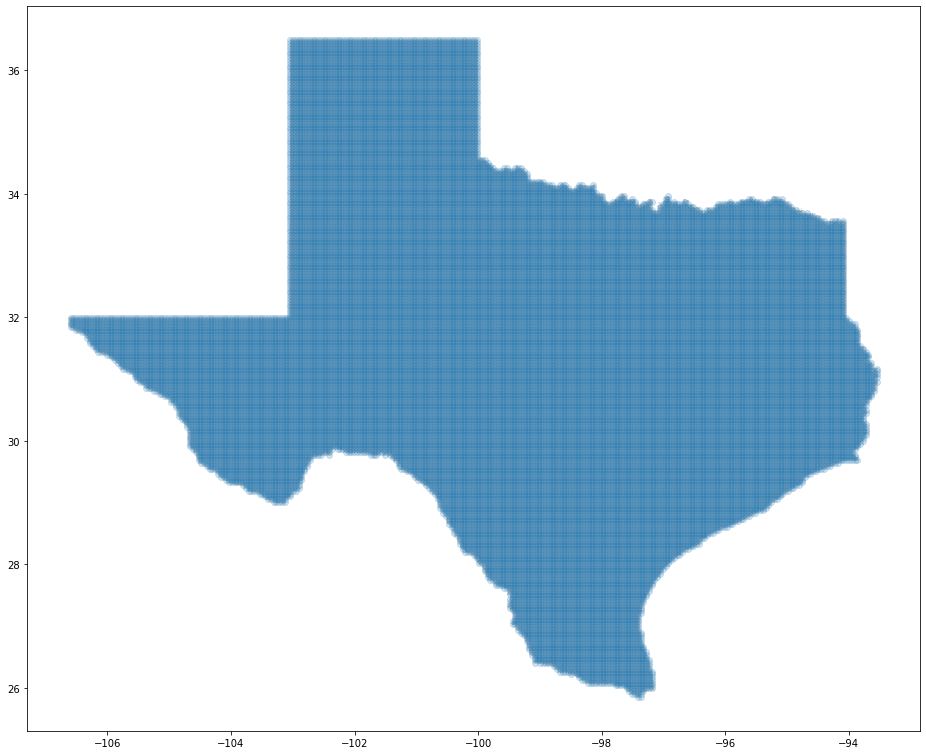

In [15]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry = geometry)
fig, ax = plt.subplots(figsize = (16,16))
texas.plot(ax=ax, alpha = 0.4, color='grey')
geo_df.plot(ax=ax,aspect=1, alpha=0.2)

In [16]:
# Calculating distance btw each grids lat and long

In [17]:
from scipy.spatial import distance
coords=[(df["Latitude"][i],df["Longitude"][i]) for i,v in df.iterrows()]

DIST=distance.cdist(coords, coords, 'euclidean')

In [18]:
fire=pd.read_csv("fire_exceedlimit.csv")

In [19]:
fire.head()

,Unnamed: 0,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,...,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
0,0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,2453394.5,...,508,13.829406,606.150654,0,0,0,0,1,1,1
1,1,284,290,2005,2453395.5,25,1830.0,5.0,Debris Burning,2453395.5,...,152,0.660279,66.078380,1,1,1,1,1,1,1
2,2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,2453442.5,...,1240,10.945493,487.879984,0,0,0,1,1,1,1
3,3,286,292,2005,2453463.5,93,1730.0,3.0,Smoking,2453463.5,...,1911,1.627272,105.735209,1,1,1,1,1,1,1
4,4,287,293,2005,2453467.5,97,1800.0,1.0,Lightning,2453468.5,...,126,6.400193,301.475036,0,1,1,1,1,1,1


In [20]:
# extracting those records which have the respond time >8minss
fire2=fire[fire["<8_min"]==0]

In [21]:
fire2["grid_id"]=""

<ipython-input-21-fd7b013e40a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire2["grid_id"]=""


In [22]:
def closest_node(node, nodes):
    a=distance.cdist([node], nodes)
    return np.argmin(a,axis=1)
    
c_grid_fire=[]
for i, v in fire2.iterrows():
    c_grid_fire.append(closest_node([fire2['LATITUDE'][i],fire2['LONGITUDE'][i]],coords))


In [23]:
c_grid_fire[0]

array([27182], dtype=int64)

In [147]:
#df=df.reset_index()
df.head()

,index,Latitude,Longitude,geometry,InTexas
0,3989,31.97865,-106.5955,POINT (-106.59550 31.97865),1
1,3990,31.93365,-106.5955,POINT (-106.59550 31.93365),1
2,3991,31.88865,-106.5955,POINT (-106.59550 31.88865),1
3,3992,31.84365,-106.5955,POINT (-106.59550 31.84365),1
4,4248,31.97865,-106.5505,POINT (-106.55050 31.97865),1


In [26]:
#df["index"][27182]

In [27]:
#Test Logic
# whats happening is that the c_rid_fire isstoring the index not the grifd numbers of the df column 
# so to test it out need to ensure that the minimum distance is only selected
# can test it out by finding the minimum distane btw firest foire record

from scipy.spatial import distance
a=1000000
r=0
for i,v in df.iterrows():
    b=distance.euclidean((df["Latitude"][i],df["Longitude"][i]),(fire2["LATITUDE"][0],fire2["LONGITUDE"][0]))
    if b<=a:
        a=b
        r=i

print(r) #so its giving 27182 which is basically the index of the df table and to find the grid_id i need to pass df["index"][r]

64037


In [28]:
len(c_grid_fire),len(np. unique(c_grid_fire))

(22024, 7325)

In [29]:
len(fire2)

22024

In [37]:
#fire2=fire2.reset_index()
fire2.head()

,level_0,Unnamed: 0,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min,grid_id
0,0,0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,...,13.829406,606.150654,0,0,0,0,1,1,1,[27182]
1,2,2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,...,10.945493,487.879984,0,0,0,1,1,1,1,[5347]
2,16,16,5219,5244,2005,2453624.5,254,1300.0,1.0,Lightning,...,26.849856,1140.125629,0,0,0,0,0,0,1,[29743]
3,30,30,5258,5283,2005,2453604.5,234,1330.0,1.0,Lightning,...,12.522759,552.564421,0,0,0,1,1,1,1,[31693]
4,32,32,5260,5285,2005,2453606.5,236,2230.0,1.0,Lightning,...,11.393166,506.239286,0,0,0,1,1,1,1,[31781]


In [39]:
for i,v in fire2.iterrows():
    fire2["grid_id"][i]=int((c_grid_fire[i]))
    #print(i)
    #fire2["grid_id"][i]=int(df["index"][c_grid_fire[i]])

<ipython-input-39-14c24d0c7f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire2["grid_id"][i]=int((c_grid_fire[i]))


In [40]:
# need to focus only on the 7325 unique grid points. For all these points needs to find the 
# set of grid indexes satisfying the limit of being less than (_) km

In [41]:
fire2

,level_0,Unnamed: 0,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min,grid_id
0,0,0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,...,13.829406,606.150654,0,0,0,0,1,1,1,27182
1,2,2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,...,10.945493,487.879984,0,0,0,1,1,1,1,22762
2,16,16,5219,5244,2005,2453624.5,254,1300.0,1.0,Lightning,...,26.849856,1140.125629,0,0,0,0,0,0,1,5347
3,30,30,5258,5283,2005,2453604.5,234,1330.0,1.0,Lightning,...,12.522759,552.564421,0,0,0,1,1,1,1,31777
4,32,32,5260,5285,2005,2453606.5,236,2230.0,1.0,Lightning,...,11.393166,506.239286,0,0,0,1,1,1,1,31602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22019,141932,141932,1852682,300285655,2015,2457290.5,268,NaN,9.0,Miscellaneous,...,30.217034,1278.215262,0,0,0,0,0,0,1,15960
22020,141981,141981,1852756,300285756,2015,2457182.5,160,NaN,9.0,Miscellaneous,...,11.777163,521.987184,0,0,0,1,1,1,1,18540
22021,141994,141994,1853502,300286560,2015,2457075.5,53,NaN,9.0,Miscellaneous,...,21.543631,922.514790,0,0,0,0,0,0,1,6997
22022,141999,141999,1853507,300286567,2015,2457284.5,262,NaN,9.0,Miscellaneous,...,11.230509,499.568651,0,0,0,1,1,1,1,7749


In [42]:
for k,v in enumerate(DIST[fire2["grid_id"][0]]):
    print(v)

10.594036058085157
10.60177461560132
10.609698393451556
10.617806976961322
10.549693123499301
10.55746418416887
10.565421193686907
10.573563732252644
10.505355776936275
10.51315961069784
10.521150127244093
10.52932690156443
10.537689500075832
10.461024089447854
10.468860969561508
10.476885271873904
10.485096566079319
10.493494413207086
10.416698133286202
10.424568336387278
10.43262670663569
10.440872808343576
10.44930619706439
10.457926419707125
10.372377981929127
10.380281788083026
10.388374511924768
10.396655712295575
10.405124939183008
10.413781733837531
10.32806371010598
10.336001402864074
10.344128769500509
10.352445363294999
10.36095072857738
10.369644400846548
10.378525906891024
10.387594764911086
10.283755393824185
10.291727260280853
10.299889562515126
10.308241848152772
10.316783655772184
10.32551451502578
10.33443394676303
10.34354146315507
10.352836567820827
10.362318755954583
10.23945311039647
10.247459441247278
10.255656975543204
10.264045255161728
10.272623812834187
10.28

8.35232003697208
8.376408836727427
8.40066961616783
8.425100889603955
8.449701178148574
8.474469009914747
8.499402920205952
8.524501451698246
7.247095970111337
7.258403750137078
7.269972489631856
7.28180094482155
7.293887852168008
7.306231928977073
7.3188318740085885
7.331686368087773
7.344794074717418
7.358153640690313
7.371763696701361
7.385622857958842
7.399729724794288
7.41408288327047
7.428680905786988
7.443522351682986
7.458605767836521
7.473929689260144
7.489492639692241
7.505293132183731
7.52132966967971
7.537600745595664
7.554104844387873
7.570840442117661
7.587806007009164
7.605000000000288
7.622420875286565
7.64006708085763
7.657937059026043
7.676029246948221
7.6943420771372315
7.71287397796726
7.731623374169524
7.750588687319471
7.769768336315091
7.78916073784619
7.808764306854486
7.82857745698442
7.84859860102456
7.868826151339518
7.889258520292304
7.909894120657036
7.930731366021974
7.951768671182832
7.973004452526339
7.994437128404028
8.016065119496277
8.03788684916657
8

7.470135540939283
7.491655357796716
7.5133830595813675
7.535316848016698
7.5574549287444865
7.579795511753886
7.60233681179704
7.625077048791337
7.6480144482084
7.671147241449903
7.694473666210346
7.717991966826897
7.741700394616453
7.0615596719141145
7.044476559688715
7.027640073310794
7.011051989537927
6.994714075643386
6.978628088672134
6.962795774687326
6.9472188680078055
6.9318990904371685
6.916838150484919
6.9020377425803465
6.887499546279738
6.873225225467559
6.859216427552317
6.845474782657778
6.8320019028102985
6.818799381123009
6.805868790977645
6.793211685204834
6.780829595263657
6.768724030421352
6.756896476934027
6.745348397229268
6.73408122909157
6.723096384851509
6.712395250579588
6.701979185285747
6.691849520125464
6.682007557613459
6.672454570845978
6.663191802732634
6.654220465238836
6.645541738639774
6.637156770786972
6.629066676388414
6.621272536303224
6.613775396851886
6.60657626914299
6.599676128417462
6.593075913411227
6.586776525737251
6.580778829287858
6.575083

6.359186268698462
6.376199887080319
6.393484965181595
6.411039307320079
6.428860707777322
6.446946951852726
6.465295816898339
6.483905073333753
6.502772485640506
6.521895813335508
6.541272811923016
6.560901233824761
6.580778829287859
6.600903347270228
6.621272536303224
6.641884145331304
6.662735924528554
6.683825626091945
6.705151005011253
6.726709819815586
6.748499833296542
6.7705188132080005
6.792764532942644
6.815234772185293
6.8379273175432
6.86083996315346
6.883970511267723
6.9073167728144345
6.930876567938838
6.954647726520997
6.978628088672134
7.002815505209581
7.027207838110649
7.051802960945787
7.076598759291345
7.1015931311223275
6.4430194784746035
6.424291789761976
6.405825473738971
6.38762279725432
6.36968602051962
6.352017396072138
6.334619167716639
6.317493569446907
6.300642824347609
6.284069143477258
6.2677747247330915
6.251761751698714
6.2360323924754395
6.2205887984983335
6.205433103337987
6.190567421489157
6.175993847147429
6.161714452975152
6.147731288857937
6.134046

5.761581814050939
5.780004325258116
5.798717530627143
5.817718625028419
5.837004796983003
5.856573230140865
5.87642110472034
5.896545598908113
5.916943890219228
5.937613156816691
5.95855057879034
5.979753339394754
6.001218626246067
6.022943632477624
6.044925557854519
6.067161609847128
6.0896490046638
6.112384968242988
6.135366737205108
6.1585915597645275
6.182056696602102
6.20575942169876
6.2296970231306545
6.253866803826491
6.278266082287608
6.302892193271515
6.327742488439541
6.352814336969329
6.378105126132924
6.403612261841211
6.429333169155503
6.455265292767073
6.4814060974454595
6.507753068456363
6.534303711949977
6.561055555320597
6.5880061475383656
6.615153059453977
5.876937978233445
5.856400344922006
5.836137421274672
5.8161520784795995
5.796447187717883
5.777025618776718
5.75789023862061
5.739043909921103
5.7204894895456695
5.70222982700649
5.684267762869942
5.66660612712781
5.649247737531292
5.632195397889033
5.615451896330551
5.599020003536546
5.582902470937707
5.5671020288

4.635218441454688
4.6358737040607165
4.636965602633001
4.638493828820044
4.640457951539011
4.642857417582586
4.645691552395793
4.648959561020255
4.652660529202796
4.656793424664835
4.661357098528458
4.666350286894636
4.671771612568583
4.677619586926844
4.68389261192031
4.690588982206997
4.697706887408119
4.705244414480684
4.713199550199597
4.721570183742024
4.730354109366623
4.739549029180066
4.749152555983194
4.759162216189076
4.769575452805179
4.7803896284719025
4.791602028549715
4.803209864247215
4.8152102757825395
4.827600335570641
4.840377051429132
4.8535373697955375
4.867078178949029
4.880996312229892
4.895288551250254
4.909951629089825
4.924982233470679
4.940377009905403
4.956132564813199
4.9722454685988575
4.9887122586898
5.005529442526725
5.022693500503681
5.04020088885373
5.058048042476656
5.076231377705507
5.094747295009044
5.113592181627508
5.132762414139388
5.152254360957154
5.1720643847502545
5.1921888447938835
5.212624099242344
5.233366507326052
5.2544124314714855
5.2757

4.050999876573837
4.050249992284581
4.0500000000001535
4.050249992284581
4.050999876573837
4.0522493753471345
4.053998026640029
4.056245184897142
4.058990022160839
4.062231529590756
4.065968519307701
4.070199626554115
4.074923312161991
4.080137865317943
4.085841406613975
4.092031891371482
4.098707113225007
4.105864707951453
4.113502157529674
4.121616794414698
4.130205806010312
4.139266239323257
4.148795005781957
4.158788886202486
4.169244535884327
4.180158489818457
4.191527167990365
4.203346880760775
4.215613834307092
4.228324136108934
4.241473800461505
4.255058754001097
4.269074841227473
4.283517830008577
4.298383417053603
4.313667233341187
4.329364849490214
4.345471781061457
4.361983493779114
4.378895408662035
4.3962029070553
4.4139013355535575
4.431986010808416
4.450452224212895
4.469295246456818
4.48851033194773
4.50809272309272
4.528037654437246
4.548340356657752
4.568996060405566
4.590000000000174
4.61134741697062
4.633033563444326
4.655053705383176
4.677403125667239
4.7000771270

4.207199187107896
4.231435926491308
4.256010455814385
4.2809169578492625
4.3061496722712045
4.331702898399361
4.357570997700604
4.3837483960648855
4.410229585860749
4.437009127779826
4.4640816524792095
4.49144186203067
4.519084531185664
4.547004508465059
4.5751967170824015
4.60365615570946
4.6323778990926066
4.661357098528458
4.690588982206997
4.72006885543015
4.749792100713642
4.77975417777962
4.809950623447371
4.840377051429132
4.87102915203777
4.9019026918128255
4.932993513071129
4.964297533387969
4.995810745014456
5.0275292142365435
5.059449080680815
5.091566556571952
5.123877925946518
5.156379543827434
5.189067835363307
5.221939294936515
5.254990485243726
5.288218036352332
5.321618644736031
5.3551890722926085
5.388926145346789
5.422826753640782
5.456887849315052
5.491106445881584
5.525479617191825
5.5600044964012705
5.59467827493256
5.629498201438775
5.6644615807685055
5.69956577293415
5.734808192084762
5.770186305484644
5.805697632498833
5.841339743586448
5.8771102593028335
5.913

6.92298346090785
6.963377413296199
7.003827525004004
7.04433282859376
7.084892377446803
7.1255052452442875
7.16617052546225
7.206887330880367
7.247654793104041
7.288472062099437
7.329338305741118
7.370252709371919
7.411214475374745
7.45222282275592
7.493276986739797
7.534376218374305
7.575519784147115
7.616706965612133
7.657937059026043
3.042079880608118
3.0364164734108363
3.0314105627579875
3.0270654105916996
3.023383865803463
3.0203683550190847
3.0180208746794133
3.0163429844765153
3.015335802195286
3.0150000000001143
3.015335802195286
3.0163429844765153
3.0180208746794133
3.0203683550190847
3.023383865803463
3.0270654105916996
3.0314105627579875
3.0364164734108363
3.042079880608118
3.048397119799306
3.0553641354183476
3.0629764935436103
3.071229395535396
3.0801176925566853
3.089635900879054
3.0997782178731317
3.1105385385815
3.121910472771559
3.1338873623665457
3.1464622991545204
3.1596281426776724
3.1733775382076375
3.1877029347165915
3.202596602758577
3.2180506521807244
3.23405704

5.55453868471562
5.59467827493256
5.634891303299684
5.67517620871832
5.71553147135089
5.7559556113648505
5.796447187717883
5.837004796983003
5.877627072212273
5.918312681837844
5.959060328609091
5.999868748564649
6.0407367100381695
6.0816630126966755
6.122646486610414
6.163685991353135
6.204780415131781
6.245928673944569
6.287129710766512
6.328382494761441
6.36968602051962
6.411039307320079
6.452441398416816
6.493891360348061
6.535388282267798
6.576931275298784
6.618519471906336
6.6601520252921675
6.7018281088075815
6.743546915385363
6.785307656989732
6.82710956408373
6.8689518851134475
6.91083388600852
6.952754849698332
6.994714075643386
7.036710879381343
7.078744592087201
7.1208145601471635
7.162920144745709
7.205060721465429
7.247235679899197
7.289444423274248
7.331686368087773
7.3739609437536435
7.416267592259881
7.458605767836521
7.500974936633522
7.543374576408381
7.585804176223136
7.628263236150442
7.670751266988421
7.71326778998399
7.755812336564402
7.798384448076705
7.84098367

4.087080253677589
4.126772346519892
4.166572332265614
4.206477148398805
4.24648383960205
4.286589553479711
4.326791536462257
4.36708712988434
4.407473766229525
4.447948965534732
4.48851033194773
4.529155550431179
4.569882383606998
4.6106886687350315
4.6515723148201875
4.692531299842513
4.733563668104793
4.7746675276925545
4.8158410480415315
4.857082457607837
4.898390041636315
4.9397621400227205
4.981197145265572
5.022693500503681
5.064249697635568
5.1058642755171215
5.147535818234003
5.189262953445512
5.231044350796701
5.27287872039573
5.3147648113535695
5.356701410383276
5.398687340456216
5.440721459512722
5.4828026592247765
5.5249298638084365
5.56710202888382
5.609318140380557
5.651577213486729
5.693878291639404
5.736220445554938
5.778602772297342
5.821024394383051
5.863484458920532
5.9059821367832335
5.9485166218144405
5.991087130062684
6.033692899046384
6.07633318704651
6.119007272426046
6.161714452975152
6.204454045280932
6.2472253841207745
6.290027821878295
6.332860727980921
6.37

3.2853082047200406
3.3266537240898457
3.368092932209689
3.40962241311276
3.4512389079866526
3.492939306658638
3.5347206395981203
3.5765800704025863
3.6185148887355694
3.6605225036872833
3.7026004375304984
3.7447463198461204
3.7869578819946077
3.82923295191101
3.8715694492028856
3.9139653805317645
3.956418835260138
3.9989279813471525
4.04149106147734
4.084106389407757
4.126772346519892
4.169487378563619
4.212249992581322
4.255058754001097
4.297912283888702
4.34080925634857
4.3837483960648855
4.4267284759742695
4.4697483150622155
4.512806776275885
4.5559027645464045
4.5990352249142
4.642203140751343
4.685405532075283
4.72864145394866
4.77190999496027
4.8152102757825395
4.8585414478011595
4.9019026918128255
4.9452932167872365
4.9887122586898
5.032159079361652
5.075632965453861
5.119133227412819
5.162659198514078
5.206210233941965
5.249785709912557
5.293385022837667
5.33700758852769
5.38065284143125
5.424320233909705
5.468009235544712
5.511719332477145
5.555450026775719
5.59920083583384
5.

3.65470929076459
3.6990437953613147
3.7433941817555176
3.7877598920735576
3.832140394088024
3.876535179770866
3.9209437639427023
3.965365683010987
4.009800493790335
4.054247772398876
4.098707113225007
4.143178127959417
4.187660444687622
4.232153707038694
4.276657573386182
4.321171716097546
4.365695820828731
4.410229585860749
4.454772721475418
4.499324949367575
4.543886002091334
4.58845562253811
4.633033563444326
4.677619586926844
4.722213464044345
4.766814974382971
4.8114239056647
4.85604005337701
4.900663220422499
4.9452932167872365
4.989929859226669
5.0345729709680365
5.079222381428279
5.123877925946518
5.1685394455302385
5.213206786614363
5.25787980083247
5.3025583447994356
5.347242279904864
5.391931472116666
5.4366257917942304
5.481325113510626
5.52602931588336
5.570738281413187
5.615451896330552
5.660170050449229
0.5867282164682606
0.5850000000000222
0.5867282164682606
0.5918825897084882
0.6003748828857077
0.6120661728931182
0.6267774724733092
0.6443019478474603
0.6644170377105282

3.195316885693933
3.240312484931167
3.2853082047200406
3.3303040401742363
3.3752999866679794
3.4202960398189055
3.4652921954722533
3.510288449686284
3.555284798718797
3.6002812390146666
3.6452777671942926
3.690274380042903
3.7352710745006252
3.7802678476532696
3.8252646967237585
3.87026161906416
3.9152586121482655
3.960255673564674
4.005252801010345
4.050249992284581
4.0952472452833995
4.1402445579942855
4.18524192849127
4.230239354930328
4.275236835545066
4.32023436864268
4.365231952600165
4.410229585860749
4.455227266930555
4.5002249943754515
4.545222766818098
4.590220582935159
4.635218441454688
4.68021634115365
4.725214280855599
4.770212259428476
4.8152102757825395
4.860208328868403
4.905206417675185
4.950204541228762
4.9952026985901075
5.04020088885373
5.085199111146186
5.130197364624678
5.17519564847572
5.220193961913874
0.10062305898749435
0.09000000000000341
0.10062305898749435
0.12727922061358338
0.16224980739588568
0.2012461179749887
0.24233241632106187
0.28460498941516493
0.3

1.937091892502853
1.9759048560090884
2.0149751859515064
2.0542881978924767
2.093830222343811
2.1335885264034262
2.1735512416320804
2.2137072977248757
2.25404636154636
2.29455878111684
2.33523553415933
2.3760681808400252
2.4170488203593328
2.4581700510746725
2.4994249338598813
2.540806958428855
2.5823100123727407
2.6239283526804846
2.6656565795316802
2.7074896121685406
2.749422666670327
2.7914512354688537
2.833571068457717
2.8757781555607913
2.9180687106373364
2.960439156611847
3.002886111726631
3.045406376824069
3.0879969235737144
3.130654883566814
3.1733775382076375
3.216162309337137
3.259006750530107
3.3019085390120706
3.3448654681467906
3.3878754404494966
3.4309364610847712
3.474046631811513
3.517204145340577
3.5604072800735818
3.603654395193993
3.646943926084004
3.690274380042903
3.733644332284619
3.7770524221939366
3.820497349822547
3.863977872607597
3.907492802296782
3.9510410020653017
3.994621383811138
4.038232905616172
4.081874569361639
4.125545418487269
4.169244535884327
4.212

3.596623416483992
3.634986244815928
3.6734996937526785
3.7121590752554026
3.7509598771515895
3.789897755876943
3.8289685295130216
3.8681681711116354
3.907492802296782
3.946938687134775
3.9865022262631693
4.026179951269097
4.0659685193077
4.105864707951454
4.145865410261325
4.185967630070893
4.226168477474762
4.266465164512817
4.3068550010421065
4.347335390788412
4.387903827569772
4.428557891684547
4.469295246456818
4.510113634932222
4.551010876717564
1.9480374739722763
1.953746401148391
1.9604718819713511
1.968203495576688
1.9769294372840667
1.9866366049180457
1.997310691905569
2.0089362856995505
2.021496970069535
2.0349754298271794
2.0493535566125036
2.0646125544518816
2.0807330439055196
2.097695163745279
2.1154786692378487
2.1340630262483686
2.1534275005210533
2.1735512416320804
2.1944133612426726
2.215993005404208
2.2382694207803446
2.261222014752286
2.2848304094615854
2.3090744899202376
2.3339344463802774
2.3593908112053885
2.3854244905258333
2.412016790986423
2.43914944191627
2.46

In [43]:
abde=[]
abde=[k for k,v in enumerate(DIST[fire2["grid_id"][0]]) if v*111<=10]
abde

[27065, 27182, 27183, 27184, 27299, 27300, 27301, 27418]

In [44]:
fire2["grids_satisfying"]=""
for i,v in fire2.iterrows():
    print(i)
    fire2["grids_satisfying"][i]=[k for k,v in enumerate(DIST[fire2["grid_id"][i]]) if v*111<=10]
    #abde=[]
    #for k,v in enumerate(DIST[fire2["grid_id"][i]]):
    #    for k2,j in enumerate(v*111):
    #        if j<=10:
    #            abde.append(k2)
    #fire2["grids_satisfying"][i]=abde 
            


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14

<ipython-input-44-9acd91e53131>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire2["grids_satisfying"][i]=[k for k,v in enumerate(DIST[fire2["grid_id"][i]]) if v*111<=10]



15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354


6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009


8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654


10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
1025

12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
1299

14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
1437

15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
1574

16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
1712

18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
1849

19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
1986

21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
2123

In [45]:
fire2

,level_0,Unnamed: 0,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min,grid_id,grids_satisfying
0,0,0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,...,606.150654,0,0,0,0,1,1,1,27182,"[27065, 27182, 27183, 27184, 27299, 27300, 273..."
1,2,2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,...,487.879984,0,0,0,1,1,1,1,22762,"[22410, 22586, 22587, 22588, 22760, 22761, 227..."
2,16,16,5219,5244,2005,2453624.5,254,1300.0,1.0,Lightning,...,1140.125629,0,0,0,0,0,0,1,5347,"[5048, 5196, 5197, 5198, 5345, 5346, 5347, 534..."
3,30,30,5258,5283,2005,2453604.5,234,1330.0,1.0,Lightning,...,552.564421,0,0,0,1,1,1,1,31777,"[31600, 31688, 31689, 31690, 31775, 31776, 317..."
4,32,32,5260,5285,2005,2453606.5,236,2230.0,1.0,Lightning,...,506.239286,0,0,0,1,1,1,1,31602,"[31425, 31513, 31514, 31515, 31600, 31601, 316..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22019,141932,141932,1852682,300285655,2015,2457290.5,268,NaN,9.0,Miscellaneous,...,1278.215262,0,0,0,0,0,0,1,15960,"[15633, 15794, 15795, 15796, 15958, 15959, 159..."
22020,141981,141981,1852756,300285756,2015,2457182.5,160,NaN,9.0,Miscellaneous,...,521.987184,0,0,0,1,1,1,1,18540,"[18192, 18364, 18365, 18366, 18538, 18539, 185..."
22021,141994,141994,1853502,300286560,2015,2457075.5,53,NaN,9.0,Miscellaneous,...,922.514790,0,0,0,0,0,0,1,6997,"[6699, 6847, 6848, 6849, 6995, 6996, 6997, 699..."
22022,141999,141999,1853507,300286567,2015,2457284.5,262,NaN,9.0,Miscellaneous,...,499.568651,0,0,0,1,1,1,1,7749,"[7449, 7598, 7599, 7600, 7747, 7748, 7749, 775..."


In [46]:
grid_e=[int(i) for i in fire2["grid_id"]]
grid_s=[i for i in fire2["grids_satisfying"]]

In [47]:
grid_e=(np.unique(grid_e))

In [48]:
K=[k for k,v in enumerate(DIST[grid_e[10]]) if v*111<=10]
K

[621, 652, 653, 683, 684, 685, 716, 717, 752]

In [49]:
grid_s2=[]
for i in range(len(grid_e)):
    print(i)
    ans=[k for k,v in enumerate(DIST[grid_e[i]]) if v*111<=10]
    grid_s2.append(ans)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368


6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008


In [50]:
grid_s2

[[472, 498, 499, 500, 524, 525, 526, 527, 528, 553, 554, 555, 582],
 [499, 525, 526, 527, 552, 553, 554, 555, 556, 581, 582, 583, 611],
 [500, 526, 527, 528, 553, 554, 555, 556, 557, 582, 583, 584, 612],
 [518, 545, 546, 547, 572, 573, 574, 575, 576, 602, 603, 604, 632],
 [527, 554, 555, 556, 581, 582, 583, 584, 585, 611, 612, 613, 641],
 [555, 582, 583, 584, 610, 611, 612, 613, 614, 640, 641, 642, 672],
 [556, 583, 584, 585, 611, 612, 613, 614, 615, 641, 642, 643, 673],
 [583, 611, 612, 613, 639, 640, 641, 642, 643, 671, 672, 673, 703],
 [592, 621, 622, 652, 653, 654, 683, 684, 716],
 [596, 624, 625, 626, 654, 655, 656, 657, 658, 686, 687, 688, 720],
 [621, 652, 653, 683, 684, 685, 716, 717, 752],
 [622, 652, 653, 654, 683, 684, 685, 686, 716, 717, 718, 753],
 [623, 653, 654, 655, 683, 684, 685, 686, 687, 717, 718, 719, 754],
 [626, 656, 657, 658, 686, 687, 688, 689, 690, 720, 721, 722, 757],
 [652, 683, 684, 716, 717, 718, 752, 753, 789],
 [653, 683, 684, 685, 716, 717, 718, 719, 752

In [51]:
# all the values of grid are convetrted into contnious starting from 0 to len(grid_e)
dict_gr={}
for i in range(len(grid_e)):
    dict_gr[grid_e[i]]=i

In [52]:
e_f=[]
for i in range(len(grid_s2)):
    t=[]
    for j in grid_s2[i]:
        if j in grid_e:
            t.append(dict_gr[j])
    e_f.append(t)

In [55]:
len(e_f), len(grid_e)

(7325, 7325)

In [54]:
import gurobipy as gp
from gurobipy import GRB
d=np.arange(len(grid_e))
e=e_f
city,coverage=gp.multidict({d[i]:[e[i]] for i in range(len(d))})

In [57]:
fire2.head()

,level_0,Unnamed: 0,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min,grid_id,grids_satisfying
0,0,0,283,289,2005,2453394.5,24,1000.0,7.0,Arson,...,606.150654,0,0,0,0,1,1,1,27182,"[27065, 27182, 27183, 27184, 27299, 27300, 273..."
1,2,2,285,291,2005,2453441.5,71,215.0,4.0,Campfire,...,487.879984,0,0,0,1,1,1,1,22762,"[22410, 22586, 22587, 22588, 22760, 22761, 227..."
2,16,16,5219,5244,2005,2453624.5,254,1300.0,1.0,Lightning,...,1140.125629,0,0,0,0,0,0,1,5347,"[5048, 5196, 5197, 5198, 5345, 5346, 5347, 534..."
3,30,30,5258,5283,2005,2453604.5,234,1330.0,1.0,Lightning,...,552.564421,0,0,0,1,1,1,1,31777,"[31600, 31688, 31689, 31690, 31775, 31776, 317..."
4,32,32,5260,5285,2005,2453606.5,236,2230.0,1.0,Lightning,...,506.239286,0,0,0,1,1,1,1,31602,"[31425, 31513, 31514, 31515, 31600, 31601, 316..."


In [63]:
###################################################################################################################

In [75]:
fire20=fire2.copy(deep=True)

In [76]:
fire20=fire20.groupby(["grid_id"],as_index=False)["FIRE_SIZE"].sum()

In [77]:
fire20

,grid_id,FIRE_SIZE
0,526,2.00
1,554,2.00
2,555,1.50
3,574,3.00
4,583,1.00
...,...,...
7320,32452,350.00
7321,32453,1.00
7322,32456,14.00
7323,32457,131.25


In [111]:
fire20["grids_satisfying"]=""
ans_final=[]
for i,v in fire20.iterrows():
    print(i)
    
    #fire20["grids_satisfying"][i]=[k for k,v in enumerate(DIST[fire20["grid_id"][i]]) if v*111<=10]
    ans=[k for k,v in enumerate(DIST[fire20["grid_id"][i]]) if v*111<=10]
    ans2=[]
    for i in ans:
        if i in fire20["grid_id"].unique():
            ans2.append(i)
    #print(ans2)
    #fire20["grids_satisfying"][i]=ans2
    #print(fire20["grids_satisfying"][i])    
    #abde=[]
    #for k,v in enumerate(DIST[fire2["grid_id"][i]]):
    #    for k2,j in enumerate(v*111):
    #        if j<=10:
    #            abde.append(k2)
    #fire2["grids_satisfying"][i]=abde 
    ans_final.append(ans2)        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357


6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999


In [113]:
fire20["grids_satisfying"]=ans_final

In [120]:
fire20.head()

,grid_id,FIRE_SIZE,grids_satisfying,fire_reached
0,526,2.0,"[526, 554, 555]",
1,554,2.0,"[526, 554, 555, 583]",
2,555,1.5,"[526, 554, 555, 583, 612]",
3,574,3.0,[574],
4,583,1.0,"[554, 555, 583, 612, 613, 641]",


In [128]:
fire20["fire_reached"]=""
for i,v in fire20.iterrows():
    f_sum=0
    for j in fire20["grids_satisfying"][i]:
        #print(j,np.where(fire20["grid_id"]==j))
        #k=int(np.where(fire20["grid_id"]==j)[0])
        #print(j,k)
        f_sum+=fire20["FIRE_SIZE"][int(np.where(fire20["grid_id"]==j)[0])]
    #print(fire20["grid_id"][i],f_sum)
    fire20["fire_reached"][i]=f_sum

<ipython-input-128-b95599430ae1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire20["fire_reached"][i]=f_sum


In [132]:
g_final=fire20["fire_reached"]
g_final=np.array(g_final)
g_final

array([5.5, 6.5, 10.0, ..., 147.25, 350.25, 16480.25], dtype=object)

In [62]:
########################################################################################################

In [236]:
m=gp.Model("set_covering1")
build=m.addVars(len(d),vtype=GRB.BINARY, name="build")
m.addConstrs((gp.quicksum(build[r] for r in city if r in coverage[t])>=1 for t in city),name="Build2cover")
m.setObjective(gp.quicksum(build[t] for t in d),GRB.MINIMIZE)
m.update()
m.write("set_covering1.lp")
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 7325 rows, 7325 columns and 45817 nonzeros
Model fingerprint: 0x9e014ba9
Variable types: 0 continuous, 7325 integer (7325 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1792.0000000
Presolve removed 7147 rows and 7143 columns
Presolve time: 0.70s
Presolved: 178 rows, 182 columns, 1475 nonzeros
Found heuristic solution: objective 1614.0000000
Variable types: 0 continuous, 182 integer (182 binary)

Root relaxation: objective 1.606572e+03, 291 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dep

In [240]:
ct2=[]
for ct in build.keys():
    if (abs(build[ct].x)>1e-6):
        ct2.append(ct)
len(ct2)

1608

In [86]:
grid_e

array([  526,   554,   555, ..., 32456, 32457, 32458])

In [87]:
# need to create grid_f again!!
# aggregate on each grid fire_size
grid_f=fire2.groupby(by = "grid_id")["FIRE_SIZE"].sum()
grid_f=np.array(grid_f)
grid_f

array([  2.  ,   2.  ,   1.5 , ...,  14.  , 131.25, 203.  ])

In [ ]:
# Model Wprking need to just give fire impact value of each grid area

In [300]:
m=gp.Model("set_covering2")
build2=m.addVars(len(d),vtype=GRB.BINARY, name="build2")
m.addConstrs((gp.quicksum(build2[r] for r in city if r in coverage[t])<=1 for t in city),name="Build2cover")
m.addConstr((gp.quicksum(build2[r] for r in city)<=25),name="Build2cover2")
m.setObjective(gp.quicksum(build2[t]*grid_f[t] for t in city),GRB.MAXIMIZE)
m.update()
m.write("set_covering2.lp")
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 7326 rows, 7325 columns and 53142 nonzeros
Model fingerprint: 0x7247385c
Variable types: 0 continuous, 7325 integer (7325 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Found heuristic solution: objective 14900.600000
Presolve removed 4319 rows and 3799 columns
Presolve time: 0.47s
Presolved: 3007 rows, 3526 columns, 19189 nonzeros
Variable types: 0 continuous, 3526 integer (3526 binary)

Root relaxation: objective 2.735356e+06, 2263 iterations, 0.26 seconds (0.13 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/

In [301]:
ans_25=[]
for ct in build2.keys():
    if (abs(build2[ct].x)>1e-6):
        ans_25.append(ct)

In [261]:
ans_10

[173, 570, 1806, 2128, 2317, 2418, 2511, 2643, 2765, 3064]

In [269]:
keys_10=[]
for i in ans_10:
    keys_10.append(([k for k, v in dict_gr.items() if v == i]))

In [267]:
keys_10

[[1645],
 [3605],
 [8151],
 [9216],
 [9803],
 [10200],
 [10569],
 [11041],
 [11411],
 [12423]]

In [276]:
grid_10=[]
lat_10=[]
long_10=[]
for i in keys_10:
    grid_10.append(df.iloc[i[0]]["index"])
    lat_10.append(df.iloc[i[0]]["Latitude"])
    long_10.append(df.iloc[i[0]]["Longitude"])

In [283]:
X_10=pd.DataFrame()
X_10["GRID"]=grid_10
X_10["LAT"]=lat_10
X_10["LONG"]=long_10
X_10["N_centers"]=10

In [287]:
##### 15 centers

In [288]:
keys_15=[]
for i in ans_15:
    keys_15.append(([k for k, v in dict_gr.items() if v == i]))

grid_15=[]
lat_15=[]
long_15=[]
for i in keys_15:
    grid_15.append(df.iloc[i[0]]["index"])
    lat_15.append(df.iloc[i[0]]["Latitude"])
    long_15.append(df.iloc[i[0]]["Longitude"])

X_15=pd.DataFrame()
X_15["GRID"]=grid_15
X_15["LAT"]=lat_15
X_15["LONG"]=long_15
X_15["N_centers"]=15
    

In [291]:
##### 20 CENTERS

In [298]:
keys_20=[]
for i in ans_20:
    keys_20.append(([k for k, v in dict_gr.items() if v == i]))

grid_20=[]
lat_20=[]
long_20=[]
for i in keys_20:
    grid_20.append(df.iloc[i[0]]["index"])
    lat_20.append(df.iloc[i[0]]["Latitude"])
    long_20.append(df.iloc[i[0]]["Longitude"])

X_20=pd.DataFrame()
X_20["GRID"]=grid_20
X_20["LAT"]=lat_20
X_20["LONG"]=long_20
X_20["N_centers"]=20

In [302]:
### 25 centers

In [303]:
keys_25=[]
for i in ans_25:
    keys_25.append(([k for k, v in dict_gr.items() if v == i]))

grid_25=[]
lat_25=[]
long_25=[]
for i in keys_25:
    grid_25.append(df.iloc[i[0]]["index"])
    lat_25.append(df.iloc[i[0]]["Latitude"])
    long_25.append(df.iloc[i[0]]["Longitude"])

X_25=pd.DataFrame()
X_25["GRID"]=grid_25
X_25["LAT"]=lat_25
X_25["LONG"]=long_25
X_25["N_centers"]=25

In [304]:
X_25

,GRID,LAT,LONG,N_centers
0,16725,29.95365,-104.3905,25
1,17231,30.49365,-104.3005,25
2,18777,30.85365,-104.0305,25
3,23707,30.44865,-103.1755,25
4,24484,30.44865,-103.0405,25
5,24748,30.22365,-102.9955,25
6,25221,32.24865,-102.9055,25
7,27071,30.58365,-102.5905,25
8,28843,32.42865,-102.2755,25
9,30693,30.76365,-101.9605,25


In [305]:
X_final=pd.concat([X_10,X_15,X_20,X_25], axis=0, ignore_index=True)
X_final

,GRID,LAT,LONG,N_centers
0,18777,30.85365,-104.0305,10
1,25221,32.24865,-102.9055,10
2,33027,30.62865,-101.5555,10
3,34850,30.17865,-101.2405,10
4,35851,31.75365,-101.0605,10
...,...,...,...,...
65,38440,31.79865,-100.6105,25
66,39211,32.06865,-100.4755,25
67,39965,33.10365,-100.3405,25
68,40198,34.27365,-100.2955,25


In [306]:
X_final.to_csv("X_final_centers.csv")

In [307]:
############# 
# Quantify the results improvements
############

In [308]:
# importing the fire data

In [318]:
fire_all = pd.read_csv("fire_data.csv")
fire_all.head()

<ipython-input-318-a103e54abead>:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_all = pd.read_csv("fire_data.csv")


,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [319]:
fire_all.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [320]:
# remember fire exist for the time metric for the actual firesstations
fire.columns

Index(['Unnamed: 0', 'index', 'FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE',
       'closest_firestation', 'closest_distance', 'time_cal', '<4_min',
       '<6_min', '<8_min', '<10_min', '<12_min', '<15_min', '<20_min'],
      dtype='object')

In [366]:
fire_all=fire_all[["FOD_ID","FIRE_YEAR","DISCOVERY_DATE","LATITUDE","LONGITUDE","STATE","FIRE_SIZE","FIRE_SIZE_CLASS"]]

In [367]:
fire_all=fire_all[fire_all["STATE"]=="TX"]

In [372]:
fire_10=fire_all.copy(deep=True)
fire_15=fire_all.copy(deep=True)
fire_20=fire_all.copy(deep=True)
fire_25=fire_all.copy(deep=True)

In [373]:
firestations=pd.read_csv("firestations_f.csv")

In [374]:
firestations=firestations[["FireDepartmentId","Latitude","Longitude"]]
firestations_10=firestations.copy(deep=True)
firestations_15=firestations.copy(deep=True)
firestations_20=firestations.copy(deep=True)
firestations_25=firestations.copy(deep=True)

In [375]:
X_10_new=X_10.copy(deep=True)
X_15_new=X_15.copy(deep=True)
X_20_new=X_20.copy(deep=True)
X_25_new=X_25.copy(deep=True)

In [377]:
#X_10_new=X_10_new.drop("N_centers",axis=1)
X_10_new
X_10_new.columns=["FireDepartmentId","Latitude","Longitude"]
X_10_new

,FireDepartmentId,Latitude,Longitude
0,18777,30.85365,-104.0305
1,25221,32.24865,-102.9055
2,33027,30.62865,-101.5555
3,34850,30.17865,-101.2405
4,35851,31.75365,-101.0605
5,36551,35.21865,-100.9255
6,37119,32.96865,-100.8355
7,37882,33.59865,-100.7005
8,38440,31.79865,-100.6105
9,39965,33.10365,-100.3405


In [379]:
firestations_10_f=pd.concat([firestations_10,X_10_new],axis=0,ignore_index=True)
firestations_10_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1845,36551,35.218650,-100.925500
1846,37119,32.968650,-100.835500
1847,37882,33.598650,-100.700500
1848,38440,31.798650,-100.610500


In [380]:
from scipy.spatial import distance
coords=[(fire_10["LATITUDE"][i],fire_10["LONGITUDE"][i]) for i,v in fire_10.iterrows()]
coords2=[(firestations_10_f["Latitude"][i],firestations_10_f["Longitude"][i]) for i,v in firestations_10_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

In [381]:
# TO convert to km
DIST=DIST*111

In [382]:
min_dist_10=[]
for i in range(len(DIST)):
    min_dist_10.append((np.min(DIST[i]),firestations_10_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))

In [384]:
fire_10=fire_10.reset_index()

In [385]:
fire_10["closest_firestation"]=""
fire_10["closest_distance"]=""

In [386]:
min_distance_10=[]
closest_fs_10=[]
for i in range(len(min_dist_10)):
    min_distance_10.append(min_dist_10[i][0])
    closest_fs_10.append(min_dist_10[i][1])

fire_10["closest_firestation"]=closest_fs_10
fire_10["closest_distance"]=min_distance_10

In [387]:
fire_10

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,closest_firestation,closest_distance
0,283,289,2005,2453394.5,33.786111,-96.150000,TX,3.00,B,508,13.829406
1,284,290,2005,2453395.5,31.312500,-94.270833,TX,55.00,C,152,0.660279
2,285,291,2005,2453441.5,33.345833,-97.595833,TX,2.00,B,1240,10.945493
3,286,292,2005,2453463.5,31.386667,-95.150556,TX,0.30,B,1911,1.627272
4,287,293,2005,2453467.5,31.354167,-95.085278,TX,55.00,C,126,6.400193
...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,31.031333,-97.618000,TX,49.70,C,1766,5.323015
142017,1856399,300289541,2015,2457316.5,32.846100,-94.967600,TX,1.00,B,950,4.731880
142018,1856439,300289582,2015,2457323.5,33.164283,-96.252667,TX,0.25,A,667,6.970155
142019,1859961,300293785,2015,2457062.5,33.054000,-94.708667,TX,250.00,D,1359,3.626507


In [388]:
t=[]
for i in range(len(fire_10)):
    t.append((0.65+0.621371*fire_10["closest_distance"][i]*1.1)*60)

In [390]:
fire_10["time_cal"]=t

In [391]:
fire_10['<4_min'] = np.where(fire_10['time_cal']<=240, 1, 0)
fire_10['<6_min'] = np.where(fire_10['time_cal']<=360, 1, 0)
fire_10['<8_min'] = np.where(fire_10['time_cal']<=480, 1, 0)
fire_10['<10_min'] = np.where(fire_10['time_cal']<=600, 1, 0)
fire_10['<12_min'] = np.where(fire_10['time_cal']<=720, 1, 0)
fire_10['<15_min'] = np.where(fire_10['time_cal']<=900, 1, 0)
fire_10['<20_min'] = np.where(fire_10['time_cal']<=12000, 1, 0)

##### replicating the steps for 15

In [402]:
#X_15_new=X_15_new.drop("N_centers",axis=1)
X_15_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_15_f=pd.concat([firestations_15,X_15_new],axis=0,ignore_index=True)
firestations_15_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1850,37882,33.598650,-100.700500
1851,38440,31.798650,-100.610500
1852,39211,32.068650,-100.475500
1853,39965,33.103650,-100.340500


In [403]:
from scipy.spatial import distance
coords=[(fire_15["LATITUDE"][i],fire_15["LONGITUDE"][i]) for i,v in fire_15.iterrows()]
coords2=[(firestations_15_f["Latitude"][i],firestations_15_f["Longitude"][i]) for i,v in firestations_15_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

In [404]:
DIST=DIST*111
min_dist_15=[]
for i in range(len(DIST)):
    min_dist_15.append((np.min(DIST[i]),firestations_15_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))

In [406]:
#fire_15=fire_15.reset_index()
fire_15["closest_firestation"]=""
fire_15["closest_distance"]=""

In [407]:
min_distance_15=[]
closest_fs_15=[]
for i in range(len(min_dist_15)):
    min_distance_15.append(min_dist_15[i][0])
    closest_fs_15.append(min_dist_15[i][1])

fire_15["closest_firestation"]=closest_fs_15
fire_15["closest_distance"]=min_distance_15

In [408]:
t=[]
for i in range(len(fire_15)):
    t.append((0.65+0.621371*fire_15["closest_distance"][i]*1.1)*60)

In [409]:
fire_15["time_cal"]=t
fire_15['<4_min'] = np.where(fire_15['time_cal']<=240, 1, 0)
fire_15['<6_min'] = np.where(fire_15['time_cal']<=360, 1, 0)
fire_15['<8_min'] = np.where(fire_15['time_cal']<=480, 1, 0)
fire_15['<10_min'] = np.where(fire_15['time_cal']<=600, 1, 0)
fire_15['<12_min'] = np.where(fire_15['time_cal']<=720, 1, 0)
fire_15['<15_min'] = np.where(fire_15['time_cal']<=900, 1, 0)
fire_15['<20_min'] = np.where(fire_15['time_cal']<=12000, 1, 0)

In [410]:
fire_15

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
0,283,289,2005,2453394.5,33.786111,-96.150000,TX,3.00,B,508,13.829406,606.150654,0,0,0,0,1,1,1
1,284,290,2005,2453395.5,31.312500,-94.270833,TX,55.00,C,152,0.660279,66.078380,1,1,1,1,1,1,1
2,285,291,2005,2453441.5,33.345833,-97.595833,TX,2.00,B,1240,10.945493,487.879984,0,0,0,1,1,1,1
3,286,292,2005,2453463.5,31.386667,-95.150556,TX,0.30,B,1911,1.627272,105.735209,1,1,1,1,1,1,1
4,287,293,2005,2453467.5,31.354167,-95.085278,TX,55.00,C,126,6.400193,301.475036,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,31.031333,-97.618000,TX,49.70,C,1766,5.323015,257.299443,0,1,1,1,1,1,1
142017,1856399,300289541,2015,2457316.5,32.846100,-94.967600,TX,1.00,B,950,4.731880,233.056706,1,1,1,1,1,1,1
142018,1856439,300289582,2015,2457323.5,33.164283,-96.252667,TX,0.25,A,667,6.970155,324.849448,0,1,1,1,1,1,1
142019,1859961,300293785,2015,2457062.5,33.054000,-94.708667,TX,250.00,D,1359,3.626507,187.724795,1,1,1,1,1,1,1


###### replicating the steps for 20

In [413]:
#X_20_new=X_20_new.drop("N_centers",axis=1)
X_20_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_20_f=pd.concat([firestations_20,X_20_new],axis=0,ignore_index=True)
firestations_20_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1855,37882,33.598650,-100.700500
1856,38440,31.798650,-100.610500
1857,39211,32.068650,-100.475500
1858,39965,33.103650,-100.340500


In [415]:
from scipy.spatial import distance
coords=[(fire_20["LATITUDE"][i],fire_20["LONGITUDE"][i]) for i,v in fire_20.iterrows()]
coords2=[(firestations_20_f["Latitude"][i],firestations_20_f["Longitude"][i]) for i,v in firestations_20_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')
DIST=DIST*111

In [416]:
min_dist_20=[]
for i in range(len(DIST)):
    min_dist_20.append((np.min(DIST[i]),firestations_20_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))

In [418]:
#fire_20=fire_20.reset_index()
fire_20["closest_firestation"]=""
fire_20["closest_distance"]=""

In [431]:
min_distance_20=[]
closest_fs_20=[]
for i in range(len(min_dist_20)):
    min_distance_20.append(min_dist_20[i][0])
    closest_fs_20.append(min_dist_20[i][1])

fire_20["closest_firestation"]=closest_fs_20
fire_20["closest_distance"]=min_distance_20

t=[]
for i in range(len(fire_20)):
    t.append((0.65+0.621371*fire_20["closest_distance"][i]*1.1)*60)

fire_20["time_cal"]=t
fire_20["time_cal"]=t
fire_20['<4_min'] = np.where(fire_20['time_cal']<=240, 1, 0)
fire_20['<6_min'] = np.where(fire_20['time_cal']<=360, 1, 0)
fire_20['<8_min'] = np.where(fire_20['time_cal']<=480, 1, 0)
fire_20['<10_min'] = np.where(fire_20['time_cal']<=600, 1, 0)
fire_20['<12_min'] = np.where(fire_20['time_cal']<=720, 1, 0)
fire_20['<15_min'] = np.where(fire_20['time_cal']<=900, 1, 0)
fire_20['<20_min'] = np.where(fire_20['time_cal']<=12000, 1, 0)


In [432]:
fire_20

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
0,283,289,2005,2453394.5,33.786111,-96.150000,TX,3.00,B,508,13.829406,606.150654,0,0,0,0,1,1,1
1,284,290,2005,2453395.5,31.312500,-94.270833,TX,55.00,C,152,0.660279,66.078380,1,1,1,1,1,1,1
2,285,291,2005,2453441.5,33.345833,-97.595833,TX,2.00,B,1240,10.945493,487.879984,0,0,0,1,1,1,1
3,286,292,2005,2453463.5,31.386667,-95.150556,TX,0.30,B,1911,1.627272,105.735209,1,1,1,1,1,1,1
4,287,293,2005,2453467.5,31.354167,-95.085278,TX,55.00,C,126,6.400193,301.475036,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,31.031333,-97.618000,TX,49.70,C,1766,5.323015,257.299443,0,1,1,1,1,1,1
142017,1856399,300289541,2015,2457316.5,32.846100,-94.967600,TX,1.00,B,950,4.731880,233.056706,1,1,1,1,1,1,1
142018,1856439,300289582,2015,2457323.5,33.164283,-96.252667,TX,0.25,A,667,6.970155,324.849448,0,1,1,1,1,1,1
142019,1859961,300293785,2015,2457062.5,33.054000,-94.708667,TX,250.00,D,1359,3.626507,187.724795,1,1,1,1,1,1,1


#### 25 stations

In [426]:
#X_25_new=X_25_new.drop("N_centers",axis=1)
X_25_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_25_f=pd.concat([firestations_25,X_25_new],axis=0,ignore_index=True)
firestations_25_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1860,38440,31.798650,-100.610500
1861,39211,32.068650,-100.475500
1862,39965,33.103650,-100.340500
1863,40198,34.273650,-100.295500


In [427]:
from scipy.spatial import distance
coords=[(fire_25["LATITUDE"][i],fire_25["LONGITUDE"][i]) for i,v in fire_25.iterrows()]
coords2=[(firestations_25_f["Latitude"][i],firestations_25_f["Longitude"][i]) for i,v in firestations_25_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')
DIST=DIST*111

In [428]:
min_dist_25=[]
for i in range(len(DIST)):
    min_dist_25.append((np.min(DIST[i]),firestations_25_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))

In [433]:
#fire_25=fire_25.reset_index()
fire_25["closest_firestation"]=""
fire_25["closest_distance"]=""

In [434]:
min_distance_25=[]
closest_fs_25=[]
for i in range(len(min_dist_25)):
    min_distance_25.append(min_dist_25[i][0])
    closest_fs_25.append(min_dist_25[i][1])

fire_25["closest_firestation"]=closest_fs_25
fire_25["closest_distance"]=min_distance_25

t=[]
for i in range(len(fire_25)):
    t.append((0.65+0.621371*fire_25["closest_distance"][i]*1.1)*60)

fire_25["time_cal"]=t
fire_25["time_cal"]=t
fire_25['<4_min'] = np.where(fire_25['time_cal']<=240, 1, 0)
fire_25['<6_min'] = np.where(fire_25['time_cal']<=360, 1, 0)
fire_25['<8_min'] = np.where(fire_25['time_cal']<=480, 1, 0)
fire_25['<10_min'] = np.where(fire_25['time_cal']<=600, 1, 0)
fire_25['<12_min'] = np.where(fire_25['time_cal']<=720, 1, 0)
fire_25['<15_min'] = np.where(fire_25['time_cal']<=900, 1, 0)
fire_25['<20_min'] = np.where(fire_25['time_cal']<=12000, 1, 0)


In [456]:
fire_25["<4_min"].sum(),fire_25["<6_min"].sum(),fire_25["<8_min"].sum(),fire_25["<10_min"].sum(),fire_25["<12_min"].sum(),fire_25["<15_min"].sum(),fire_25["<20_min"].sum()

(58429, 97155, 120397, 130960, 135512, 138654, 142021)

In [446]:
final_comp_df=pd.DataFrame()

In [457]:
len(fire2)

22024

In [458]:
fire3=fire2[["LATITUDE","LONGITUDE","FIRE_SIZE_CLASS","FIRE_SIZE"]]
fire3.to_csv("fire_optimization.csv")

In [484]:
fire["<4_min"][fire["FIRE_SIZE_CLASS"]=="G"].sum()

26

In [486]:
fire_10["<4_min"][fire["FIRE_SIZE_CLASS"]=="G"].sum()

36

In [487]:
fire_25["<4_min"][fire["FIRE_SIZE_CLASS"]=="G"].sum()

52

#### NEW MODEL #

In [161]:
m=gp.Model("set_covering2")
build2=m.addVars(len(d),vtype=GRB.BINARY, name="build2")
m.addConstrs((gp.quicksum(build2[r] for r in city if r in coverage[t])<=1 for t in city),name="Build2cover")
m.addConstr((gp.quicksum(build2[r] for r in city)<=20),name="Build2cover2")
m.setObjective(gp.quicksum(build2[t]*g_final[t] for t in city),GRB.MAXIMIZE)
m.update()
m.write("set_covering2.lp")
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 7326 rows, 7325 columns and 53142 nonzeros
Model fingerprint: 0xbd327145
Variable types: 0 continuous, 7325 integer (7325 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 53505.200000
Presolve removed 3229 rows and 2122 columns
Presolve time: 0.14s
Presolved: 4097 rows, 5203 columns, 31753 nonzeros
Variable types: 0 continuous, 5203 integer (5203 binary)

Root relaxation: objective 2.776974e+06, 6717 iterations, 0.33 seconds (0.48 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/

In [162]:
ans_20=[]
for ct in build2.keys():
    if (abs(build2[ct].x)>1e-6):
        ans_20.append(ct)

In [163]:
keys_20=[]
for i in ans_20:
    keys_20.append(([k for k, v in dict_gr.items() if v == i]))
grid_20=[]
lat_20=[]
long_20=[]
for i in keys_20:
    grid_20.append(df.iloc[i[0]]["index"])
    lat_20.append(df.iloc[i[0]]["Latitude"])
    long_20.append(df.iloc[i[0]]["Longitude"])

X_20=pd.DataFrame()
X_20["GRID"]=grid_20
X_20["LAT"]=lat_20
X_20["LONG"]=long_20
X_20["N_centers"]=20

In [221]:
X_final2=pd.concat([X_10,X_15,X_20,X_25], axis=0, ignore_index=True)
X_final2

,GRID,LAT,LONG,N_centers
0,18259,30.85365,-104.1205,10
1,25008,30.17865,-102.9505,10
2,25739,32.24865,-102.8155,10
3,34849,30.22365,-101.2405,10
4,35593,31.70865,-101.1055,10
...,...,...,...,...
65,39963,33.19365,-100.3405,25
66,40199,34.22865,-100.2955,25
67,45511,28.28865,-99.3955,25
68,75265,29.68365,-94.2205,25


In [222]:
X_final2.to_csv("X_FINAL2.csv")

In [136]:
fire_all = pd.read_csv("fire_data.csv")
fire_all.head()

<ipython-input-136-a103e54abead>:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_all = pd.read_csv("fire_data.csv")


,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [137]:
fire_all=fire_all[["FOD_ID","FIRE_YEAR","DISCOVERY_DATE","LATITUDE","LONGITUDE","STATE","FIRE_SIZE","FIRE_SIZE_CLASS"]]

In [138]:
fire_all=fire_all[fire_all["STATE"]=="TX"]

In [139]:
fire_10=fire_all.copy(deep=True)
fire_15=fire_all.copy(deep=True)
fire_20=fire_all.copy(deep=True)
fire_25=fire_all.copy(deep=True)

In [140]:
firestations=pd.read_csv("firestations_f.csv")

In [141]:
firestations=firestations[["FireDepartmentId","Latitude","Longitude"]]
firestations_10=firestations.copy(deep=True)
firestations_15=firestations.copy(deep=True)
firestations_20=firestations.copy(deep=True)
firestations_25=firestations.copy(deep=True)

In [169]:
X_10_new=X_10.copy(deep=True)
X_15_new=X_15.copy(deep=True)
X_20_new=X_20.copy(deep=True)
X_25_new=X_25.copy(deep=True)

### for 10 centers ##

In [185]:
#X_10_new=X_10_new.drop("N_centers",axis=1)
X_10_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_10_f=pd.concat([firestations_10,X_10_new],axis=0,ignore_index=True)
firestations_10_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1845,36552,35.173650,-100.925500
1846,36601,32.968650,-100.925500
1847,38440,31.798650,-100.610500
1848,39963,33.193650,-100.340500


In [186]:
from scipy.spatial import distance
coords=[(fire_10["LATITUDE"][i],fire_10["LONGITUDE"][i]) for i,v in fire_10.iterrows()]
coords2=[(firestations_10_f["Latitude"][i],firestations_10_f["Longitude"][i]) for i,v in firestations_10_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

DIST=DIST*111
min_dist_10=[]
for i in range(len(DIST)):
    min_dist_10.append((np.min(DIST[i]),firestations_10_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))
    

In [187]:
#fire_10=fire_10.reset_index()
fire_10["closest_firestation"]=""
fire_10["closest_distance"]=""

In [188]:
min_distance_10=[]
closest_fs_10=[]
for i in range(len(min_dist_10)):
    min_distance_10.append(min_dist_10[i][0])
    closest_fs_10.append(min_dist_10[i][1])

fire_10["closest_firestation"]=closest_fs_10
fire_10["closest_distance"]=min_distance_10

In [189]:
t=[]
for i in range(len(fire_10)):
    t.append((0.65+0.621371*fire_10["closest_distance"][i]*1.1)*60)

In [190]:
fire_10["time_cal"]=t
fire_10['<4_min'] = np.where(fire_10['time_cal']<=240, 1, 0)
fire_10['<6_min'] = np.where(fire_10['time_cal']<=360, 1, 0)
fire_10['<8_min'] = np.where(fire_10['time_cal']<=480, 1, 0)
fire_10['<10_min'] = np.where(fire_10['time_cal']<=600, 1, 0)
fire_10['<12_min'] = np.where(fire_10['time_cal']<=720, 1, 0)
fire_10['<15_min'] = np.where(fire_10['time_cal']<=900, 1, 0)
fire_10['<20_min'] = np.where(fire_10['time_cal']<=12000, 1, 0)

In [191]:
fire_10["<8_min"].sum() - fire["<8_min"].sum()

401

##### 15 centers ###

In [192]:
#X_15_new=X_15_new.drop("N_centers",axis=1)
X_15_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_15_f=pd.concat([firestations_15,X_15_new],axis=0,ignore_index=True)
firestations_15_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1850,37623,33.598650,-100.745500
1851,38440,31.798650,-100.610500
1852,38951,32.113650,-100.520500
1853,39963,33.193650,-100.340500


In [193]:
from scipy.spatial import distance
coords=[(fire_15["LATITUDE"][i],fire_15["LONGITUDE"][i]) for i,v in fire_15.iterrows()]
coords2=[(firestations_15_f["Latitude"][i],firestations_15_f["Longitude"][i]) for i,v in firestations_15_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

DIST=DIST*111
min_dist_15=[]
for i in range(len(DIST)):
    min_dist_15.append((np.min(DIST[i]),firestations_15_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))
    

In [195]:
#fire_15=fire_15.reset_index()
fire_15["closest_firestation"]=""
fire_15["closest_distance"]=""

In [196]:
min_distance_15=[]
closest_fs_15=[]
for i in range(len(min_dist_15)):
    min_distance_15.append(min_dist_15[i][0])
    closest_fs_15.append(min_dist_15[i][1])

fire_15["closest_firestation"]=closest_fs_15
fire_15["closest_distance"]=min_distance_15

In [197]:
t=[]
for i in range(len(fire_15)):
    t.append((0.65+0.621371*fire_15["closest_distance"][i]*1.1)*60)

In [198]:
fire_15["time_cal"]=t
fire_15['<4_min'] = np.where(fire_15['time_cal']<=240, 1, 0)
fire_15['<6_min'] = np.where(fire_15['time_cal']<=360, 1, 0)
fire_15['<8_min'] = np.where(fire_15['time_cal']<=480, 1, 0)
fire_15['<10_min'] = np.where(fire_15['time_cal']<=600, 1, 0)
fire_15['<12_min'] = np.where(fire_15['time_cal']<=720, 1, 0)
fire_15['<15_min'] = np.where(fire_15['time_cal']<=900, 1, 0)
fire_15['<20_min'] = np.where(fire_15['time_cal']<=12000, 1, 0)

In [199]:
fire_15["<8_min"].sum() - fire["<8_min"].sum()

492

#### 20 centers #

In [201]:
#X_20_new=X_20_new.drop("N_centers",axis=1)
X_20_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_20_f=pd.concat([firestations_20,X_20_new],axis=0,ignore_index=True)
firestations_20_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1855,38951,32.113650,-100.520500
1856,39963,33.193650,-100.340500
1857,45511,28.288650,-99.395500
1858,75265,29.683650,-94.220500


In [202]:
from scipy.spatial import distance
coords=[(fire_20["LATITUDE"][i],fire_20["LONGITUDE"][i]) for i,v in fire_20.iterrows()]
coords2=[(firestations_20_f["Latitude"][i],firestations_20_f["Longitude"][i]) for i,v in firestations_20_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

DIST=DIST*111
min_dist_20=[]
for i in range(len(DIST)):
    min_dist_20.append((np.min(DIST[i]),firestations_20_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))
    

In [204]:
#fire_20=fire_20.reset_index()
fire_20["closest_firestation"]=""
fire_20["closest_distance"]=""

In [205]:
min_distance_20=[]
closest_fs_20=[]
for i in range(len(min_dist_20)):
    min_distance_20.append(min_dist_20[i][0])
    closest_fs_20.append(min_dist_20[i][1])

fire_20["closest_firestation"]=closest_fs_20
fire_20["closest_distance"]=min_distance_20

In [206]:
t=[]
for i in range(len(fire_20)):
    t.append((0.65+0.621371*fire_20["closest_distance"][i]*1.1)*60)

In [207]:
fire_20["time_cal"]=t
fire_20['<4_min'] = np.where(fire_20['time_cal']<=240, 1, 0)
fire_20['<6_min'] = np.where(fire_20['time_cal']<=360, 1, 0)
fire_20['<8_min'] = np.where(fire_20['time_cal']<=480, 1, 0)
fire_20['<10_min'] = np.where(fire_20['time_cal']<=600, 1, 0)
fire_20['<12_min'] = np.where(fire_20['time_cal']<=720, 1, 0)
fire_20['<15_min'] = np.where(fire_20['time_cal']<=900, 1, 0)
fire_20['<20_min'] = np.where(fire_20['time_cal']<=12000, 1, 0)

In [208]:
fire_20["<8_min"].sum() - fire["<8_min"].sum()

649


#### 25 centers ##

In [211]:
#X_25_new=X_25_new.drop("N_centers",axis=1)
X_25_new.columns=["FireDepartmentId","Latitude","Longitude"]
firestations_25_f=pd.concat([firestations_25,X_25_new],axis=0,ignore_index=True)
firestations_25_f

,FireDepartmentId,Latitude,Longitude
0,711,32.010900,-97.374000
1,1696,31.997800,-96.227200
2,246,30.870400,-95.204400
3,1032,31.746636,-95.537077
4,1644,30.860360,-95.312180
...,...,...,...
1860,39963,33.193650,-100.340500
1861,40199,34.228650,-100.295500
1862,45511,28.288650,-99.395500
1863,75265,29.683650,-94.220500


In [212]:
from scipy.spatial import distance
coords=[(fire_25["LATITUDE"][i],fire_25["LONGITUDE"][i]) for i,v in fire_25.iterrows()]
coords2=[(firestations_25_f["Latitude"][i],firestations_25_f["Longitude"][i]) for i,v in firestations_25_f.iterrows()]

DIST=distance.cdist(coords, coords2, 'euclidean')

DIST=DIST*111
min_dist_25=[]
for i in range(len(DIST)):
    min_dist_25.append((np.min(DIST[i]),firestations_25_f["FireDepartmentId"][np.where(DIST[i]==np.min(DIST[i]))[0][0]]))
    

In [214]:
#fire_25=fire_25.reset_index()
fire_25["closest_firestation"]=""
fire_25["closest_distance"]=""

In [215]:
min_distance_25=[]
closest_fs_25=[]
for i in range(len(min_dist_25)):
    min_distance_25.append(min_dist_25[i][0])
    closest_fs_25.append(min_dist_25[i][1])

fire_25["closest_firestation"]=closest_fs_25
fire_25["closest_distance"]=min_distance_25

In [231]:
t=[]
for i in range(len(fire_25)):
    t.append((0.65+0.621371*fire_25["closest_distance"][i]*1.1)*60)

In [232]:
fire_25["time_cal"]=t
fire_25['<4_min'] = np.where(fire_25['time_cal']<=240, 1, 0)
fire_25['<6_min'] = np.where(fire_25['time_cal']<=360, 1, 0)
fire_25['<8_min'] = np.where(fire_25['time_cal']<=480, 1, 0)
fire_25['<10_min'] = np.where(fire_25['time_cal']<=600, 1, 0)
fire_25['<12_min'] = np.where(fire_25['time_cal']<=720, 1, 0)
fire_25['<15_min'] = np.where(fire_25['time_cal']<=900, 1, 0)
fire_25['<20_min'] = np.where(fire_25['time_cal']<=12000, 1, 0)

In [233]:
fire_25["<4_min"].sum() - fire["<4_min"].sum()

203

In [239]:
fire_10["<12_min"].sum() - fire["<12_min"].sum()

596

In [240]:
fire_10

,index,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,closest_firestation,closest_distance,time_cal,<4_min,<6_min,<8_min,<10_min,<12_min,<15_min,<20_min
0,283,289,2005,2453394.5,33.786111,-96.150000,TX,3.00,B,508,13.829406,606.150654,0,0,0,0,1,1,1
1,284,290,2005,2453395.5,31.312500,-94.270833,TX,55.00,C,152,0.660279,66.078380,1,1,1,1,1,1,1
2,285,291,2005,2453441.5,33.345833,-97.595833,TX,2.00,B,1240,10.945493,487.879984,0,0,0,1,1,1,1
3,286,292,2005,2453463.5,31.386667,-95.150556,TX,0.30,B,1911,1.627272,105.735209,1,1,1,1,1,1,1
4,287,293,2005,2453467.5,31.354167,-95.085278,TX,55.00,C,126,6.400193,301.475036,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,1856360,300289501,2015,2457314.5,31.031333,-97.618000,TX,49.70,C,1766,5.323015,257.299443,0,1,1,1,1,1,1
142017,1856399,300289541,2015,2457316.5,32.846100,-94.967600,TX,1.00,B,950,4.731880,233.056706,1,1,1,1,1,1,1
142018,1856439,300289582,2015,2457323.5,33.164283,-96.252667,TX,0.25,A,667,6.970155,324.849448,0,1,1,1,1,1,1
142019,1859961,300293785,2015,2457062.5,33.054000,-94.708667,TX,250.00,D,1359,3.626507,187.724795,1,1,1,1,1,1,1


In [270]:
fire_10["<4_min"].sum()-fire["<4_min"].sum()

86